# Building an Optimal Premium Model in an insurance company 

- author: YOUR_NAME_HERE
- date: DATE_HERE
- version: VERSION

## Problem description

We are interested in solving a CRM problem for an insurance company. The tasks to be achieved are: 
* Finding the ideal target, in this case, people who are more likely to contract the insurance.
* Obtaining the premium we should offer to each client, it means, the optimal price that should be offered to the clients. 
* Calculating the difference between offering the premium randomly and optimally using the information obtained in the model.
* Creating a simple visualization tool that helps identifying which variables have a greater impact on contracting the company’s insurance. The ideal tool should compare the results of your model to the descriptive analysis.  


## Phases

### 1. Working with data:  
 
Two databases with clients’ information are available.  
 
In the first one we have the information of 20.000 clients which have already been contacted; 9% of them have contracted the product.  
 
Important data is included such as the premium offered, the number of products that they have already bought, the number of years that they have been clients of the company and the socioeconomic status (an economic and sociological measure combined with the person’s work experience and its individual’s or family’s economic and social position in relation to others, based on income, education, and occupation). 
 
In the second database of non-previously contacted clients, we have the same information of 10.000 clients but only 5.000 are going to be contacted due to mechanical restrictions
 

## Main goal

Is it worth offering the same premium to all the clients? Is it better to focus on people with some characteristics rather than choosing the clients randomly? 


## CVL and Data Science

Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

To select the most appropiate method, **other aspects from accuracy**, which is the most common parameter, can and should be considered as form example: robustness, speed, interpretability, and ease of use. In this practice we propose a methodology for evaluating statisticl models for classification with the use of a composite indicator. This one measures multidimensional concepts which cannot be captured by a single parameter and help decision makers to solve this complex problem.

We test our proposal on a set of five churn classification models drawn from a real experience, three of the, being based on individual classifiers(**logistic regression, decision tree, neural networks**), and other two constructed by using combined classifiers (**AdaBoost and Random Forest**).

We will consider four different alternatives to add another values as input variables selection that will be influence on the performance of the churn prediction model: original variables, aggregate variables, PCA (Principal Component Analysis), and stacking procedure.



***
  


### Business understanding

But how to start working with churn rate prediction? Which data is needed? And what are the steps to implementation?

As with any machine learning task, data science specialists first need data to work with. Depending on the goal, researchers define what data they must collect. Next, selected data is prepared, preprocessed, and transformed in a form suitable for building machine learning models. Finding the right methods to training machines, fine-tuning the models, and selecting the best performers is another significant part of the work. Once a model that makes predictions with the highest accuracy is chosen, it can be put into production.

The overall scope of work data scientists carry out to build ML-powered systems capable to forecast customer attrition may look like the following:

- Understanding a problem and final goal
- Data collection
- Data preparation and preprocessing
- Modeling and testing
- Model deployment and monitoring

### Understanding a problem and a final goal

It’s important to understand what insights one needs to get from the analysis. In short, we must decide what question to ask and consequently what type of machine learning problem to solve: classification or regression.

## Model Pipeline

Companies that constantly monitor how people engage with products, encourage clients to share opinions, and solve their issues promptly have greater opportunities to maintain mutually beneficial client relationships.

And now imagine a company that has been gathering customer data for a while, so it can use it to identify behavior patterns of potential churners, segment these at-risk customers, and take appropriate actions to gain back their trust. Those following a proactive approach to customer churn management use predictive analytics. That’s one of four analytics types that entails forecasting the probability of future outcomes, events, or values by analyzing current and historical data. Predictive analytics utilizes various statistical techniques, such as data mining (pattern recognition) and machine learning (ML).

The prediction process is heavily data-driven and often utilizes advanced machine learning techniques. In this post, we'll take a look at what types of customer data are typically used, do some preliminary analysis of the data, and generate churn prediction models — all with Spark and its machine learning frameworks.

![](https://github.com/marcusRB/datascience/blob/master/Churn%20Prediction/img/Picture1.png?raw=true)

## Data Science Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.


0. **Environment**.
1. **Check libraries version**.
2. **Import Libraries**.
3. **Question or problem definition**.
4. **Acquire dataset or training and testing data**.
5. **Analyze, identify patterns, and explore the data**.

6. Wrangle, prepare, cleanse the data.
7. Feature Engineering
8. Model, predict and solve the problem.
9. Visualize, report, and present the problem solving steps and final solution.
10. Create or solve AI pipeline on Cloud, architecture solution and shows results.

Could be to exist another substeps during Data Processing and Data Modeling, for to train and deploy many machine learning and/or deep learning combination pipelines.

***

## 0. Environment

We Install packages, upgrade and update libraries, modules and dependencies on my virtual environment, local operating system or cloud framework such as (google colab, kaggle or machine learning on GCP, AWS, Azure).

In [1]:
# Install packages and dependencies or upgrade/update

##!pip install plotly
#!conda install --update-deps --yes scikit-learn


#Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.
#!pip3 install xlrd==1.1.0

## 1. Check the versions of libraries

My check of the versions of libraries on differents frameworks and environment, like as MacOS, Win10, Ubuntu-Linux, etc. with the scope to find incongruence or deprecated modules during all the workflow.

In [2]:
# Check the versions of libraries on MacOS12

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Dec 30 2019, 19:38:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


***

## 2. Import Libraries and modules

We create grouping for different libraries and modules per workflow block or step.

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, minmax_scale)

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

***

## 3. Load dataset

Only if we use different way to load dataset from cloud storage, google drive or locally, we develop different chunks or API connection.

In [6]:
# Read the excel files, sheets_name are:
# 0 = index
# 1 = first database classified
# 2 = second database not classified

# Load first sheet with variables name and description
xls = pd.ExcelFile("Database.xlsx")
data_0 = pd.read_excel(xls, sheet_name=0 )
data_0.head(5)

,Variable Name,Meaning
0,Obs,Number of Observations
1,Sales,It indicates whether the client bought a produ...
2,Price Sensitivity,It indicates the client's sensitivity to the p...
3,PhoneType,Client's phone type: Fixed or Mobile
4,Email,It indicates whether the client's email is ava...


In [7]:
# Load second sheet with classified values
data_1 = pd.read_excel('Database.xlsx', sheet_name=1 )
data_1.head(5)

,Obs,Sales,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,0,NaN,FIXED / LAND PHONE,0,2012,2,0,0,11.12,...,76897.09528,two,Low,35147.05566,0.000,NaN,NaN,NaN,NaN,Urban
1,2,1,NaN,MOBILE PHONE,0,2011,2,0,1,11.12,...,18037.38088,None,Low,8133.08226,0.000,NaN,NaN,NaN,NaN,Rustic
2,3,0,NaN,FIXED / LAND PHONE,0,1992,2,0,0,14.50,...,69779.49768,two,Low,31880.39706,98010.783,3.0,2.0,1.0,0.0,Urban
3,4,0,NaN,MOBILE PHONE,0,2011,2,0,0,14.50,...,40574.30488,One,Low,18476.52126,0.000,NaN,NaN,NaN,NaN,Urban
4,5,0,NaN,MOBILE PHONE,0,1992,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Load third sheet with non-previously contacted clients
data_2 = pd.read_excel('Database.xlsx', sheet_name=2 )
data_2.head(5)

,Obs,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Socieconomic Status,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,6.0,FIXED / LAND PHONE,0,2011,4,0,0,1962.0,High,...,40289.464296,One,Low,18386.272962,56033.07732,2.0,1.0,1.0,0.0,Urban
1,2,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Medium,...,13824.893096,None,Low,6240.219762,0.00000,NaN,NaN,NaN,NaN,Urban
2,3,NaN,FIXED / LAND PHONE,0,2011,6,0,1,NaN,Low,...,74436.255496,two,Low,34058.121162,66860.13132,0.0,0.0,0.0,0.0,Urban
3,4,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1976.0,Low,...,66466.846696,two,Low,30400.519362,428621.27832,0.0,1.0,0.0,0.0,Urban
4,5,NaN,MOBILE PHONE,0,2013,2,0,0,1949.0,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***

## 4. Data description

We check the basic info of datasets

In [9]:
# Check dataframe structure
data_0.info()
print("*-"*20)
data_1.info()
print("*-"*20)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Variable Name  33 non-null     object
 1   Meaning        33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Obs                              20000 non-null  int64  
 1   Sales                            20000 non-null  int64  
 2   Price Sensitivity                1475 non-null   float64
 3   PhoneType                        20000 non-null  object 
 4   Email                            20000 non-null  int64  
 5   Tenure                           20000 non-null  int64  
 6   NumberofCampaigns             

> We check difference of two columns between data_1 and data_2

In [10]:
# Check dataframe dataType
for i in data_1, data_2:
    print(i.dtypes)
    print("*-"*20)

Obs                                  int64
Sales                                int64
Price Sensitivity                  float64
PhoneType                           object
Email                                int64
Tenure                               int64
NumberofCampaigns                    int64
ProdActive                           int64
ProdBought                           int64
Premium Offered                    float64
Phone Call Day                      object
CodeCategory                        object
Birthdate                          float64
Product Type                        object
Number of Semesters Paid           float64
Socieconomic Status                 object
Province                            object
Right Address                       object
Living Area (m^2)                  float64
House Price                        float64
Income                             float64
yearBuilt                          float64
House Insurance                    float64
Pension Pla

In [11]:
# Check dataframe basic info
print("First Dataset has {0} Rows and {1} Cols. or variables".format(data_1.shape[0],format(data_1.shape[1])))
print("Second Dataset has {0} Rows and {1} Cols. or variables".format(data_2.shape[0],format(data_2.shape[1])))

First Dataset has 20000 Rows and 33 Cols. or variables
Second Dataset has 10000 Rows and 27 Cols. or variables


In [12]:
# Check which column miss in the second dataset
columns1, columns2 = data_1.columns, data_2.columns
columns1, columns2

(Index(['Obs', 'Sales', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
        'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Premium Offered',
        'Phone Call Day', 'CodeCategory', 'Birthdate', 'Product Type',
        'Number of Semesters Paid', 'Socieconomic Status', 'Province',
        'Right Address', 'Living Area (m^2)', 'House Price', 'Income',
        'yearBuilt', 'House Insurance', 'Pension Plan',
        'Estimated number of cars', 'Probability of Second Residence', 'Credit',
        'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
        '3G Devices', 'Type of House'],
       dtype='object'),
 Index(['Obs', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
        'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Birthdate',
        'Socieconomic Status', 'Province', 'Right Address', 'Living Area (m^2)',
        'House Price', 'Income', 'yearBuilt', 'House Insurance', 'Pension Plan',
        'Estimated number of cars', 'Probability of Se

In [13]:
# Create a intersection between column of the first dataset and second one
columns = columns1.intersection(columns2)
columns

Index(['Obs', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
       'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Birthdate',
       'Socieconomic Status', 'Province', 'Right Address', 'Living Area (m^2)',
       'House Price', 'Income', 'yearBuilt', 'House Insurance', 'Pension Plan',
       'Estimated number of cars', 'Probability of Second Residence', 'Credit',
       'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices', 'Type of House'],
      dtype='object')

In [14]:
# And check which columns miss in columns2
cols_diff = columns1.difference(columns2)
cols_diff

Index(['CodeCategory', 'Number of Semesters Paid', 'Phone Call Day',
       'Premium Offered', 'Product Type', 'Sales'],
      dtype='object')

> There are 6 columns missed in the second dataset, where `Premium Offered` and related features, the other one is `Sales`. Both will be the independent variables to predict. First variable is the **linear regression** problem to predict the *price*, second one is the **logistic regression** problem to check if contract or not the service offered.

In [15]:
# Check unique values of the first dataset
print ("\nUnique values :  \n", data_1.nunique())


Unique values :  
 Obs                                20000
Sales                                  2
Price Sensitivity                      6
PhoneType                              2
Email                                  2
Tenure                                24
NumberofCampaigns                     16
ProdActive                             4
ProdBought                             7
Premium Offered                        3
Phone Call Day                         6
CodeCategory                           7
Birthdate                             41
Product Type                           3
Number of Semesters Paid               4
Socieconomic Status                    4
Province                              34
Right Address                          2
Living Area (m^2)                   7142
House Price                        14241
Income                             14232
yearBuilt                            112
House Insurance                    14081
Pension Plan                       14

In [16]:
# Check unique values of the second dataset
print ("\nUnique values :  \n",data_2.nunique())


Unique values :  
 Obs                                10000
Price Sensitivity                      6
PhoneType                              2
Email                                  2
Tenure                                32
NumberofCampaigns                     17
ProdActive                             3
ProdBought                             6
Birthdate                             41
Socieconomic Status                    4
Province                              33
Right Address                          2
Living Area (m^2)                   4643
House Price                         7577
Income                              7574
yearBuilt                            108
House Insurance                     7524
Pension Plan                        7543
Estimated number of cars               4
Probability of Second Residence        3
Credit                              7543
Savings                             3669
Number of Mobile Phones                4
Number of Fixed Lines                

In [17]:
# Check dataframe basic stats of the first and second dataset only for numerical variables
data_1.describe()

,Obs,Sales,Price Sensitivity,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Birthdate,...,Income,yearBuilt,House Insurance,Pension Plan,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices
count,20000.000000,20000.000000,1475.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,9512.000000,...,1.486000e+04,14865.000000,14860.000000,1.486000e+04,1.486000e+04,1.484500e+04,7164.000000,7164.000000,7164.000000,7164.000000
mean,10000.500000,0.085750,3.792542,0.074450,2007.118950,3.709200,0.050700,0.320200,13.831877,1966.409062,...,5.802174e+04,1979.502657,7364.270664,3.728715e+04,1.696786e+04,3.055875e+04,1.504467,1.005444,0.502233,0.503769
std,5773.647028,0.280002,1.694535,0.262508,6.715032,4.156429,0.238186,0.706397,2.774808,11.478364,...,6.644060e+04,23.073381,8542.363258,4.239543e+04,1.945761e+04,7.872496e+04,1.120473,0.817475,0.500030,0.500021
min,1.000000,0.000000,1.000000,0.000000,1990.000000,2.000000,0.000000,0.000000,11.120000,1944.000000,...,2.190805e+03,1900.000000,186.013800,1.661723e+03,6.173887e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,0.000000,2.000000,0.000000,2004.000000,2.000000,0.000000,0.000000,11.120000,1957.000000,...,3.348828e+04,1968.000000,4209.963300,2.163244e+04,9.783053e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,0.000000,4.000000,0.000000,2010.000000,2.000000,0.000000,0.000000,14.500000,1967.000000,...,4.624406e+04,1980.000000,5849.992800,2.977184e+04,1.351867e+04,0.000000e+00,2.000000,1.000000,1.000000,1.000000
75%,15000.250000,0.000000,5.000000,0.000000,2012.000000,4.000000,0.000000,0.000000,14.500000,1976.000000,...,6.567726e+04,1999.000000,8348.550300,4.217209e+04,1.920983e+04,4.728410e+04,3.000000,2.000000,1.000000,1.000000
max,20000.000000,1.000000,6.000000,1.000000,2013.000000,32.000000,3.000000,6.000000,21.850000,1984.000000,...,4.106372e+06,2012.000000,527866.417800,2.620520e+06,1.202556e+06,4.884174e+06,3.000000,2.000000,1.000000,1.000000


In [18]:
data_2.describe()

,Obs,Price Sensitivity,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Living Area (m^2),House Price,Income,yearBuilt,House Insurance,Pension Plan,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices
count,10000.00000,2694.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,4541.000000,7831.000000,7.830000e+03,7.831000e+03,7831.000000,7831.000000,7.831000e+03,7.831000e+03,7.831000e+03,3760.000000,3760.000000,3760.000000,3760.000000
mean,5000.50000,3.399777,0.046900,2011.248300,3.571400,0.022300,0.24210,1966.269764,203.416630,2.198855e+05,6.002617e+04,1978.753288,7648.644968,3.849267e+04,1.756162e+04,3.229642e+04,1.520479,0.992287,0.509309,0.499202
std,2886.89568,1.766382,0.211435,5.019897,4.237747,0.156221,0.64802,11.597210,597.405984,3.112247e+05,8.546163e+04,23.229961,10987.924223,5.453266e+04,2.502805e+04,8.328343e+04,1.116566,0.813359,0.499980,0.500066
min,1.00000,1.000000,0.000000,1950.000000,2.000000,0.000000,0.00000,1944.000000,0.000000,7.057584e+03,1.580315e+03,1900.000000,134.177400,1.198663e+03,4.453454e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,2.000000,0.000000,2012.000000,2.000000,0.000000,0.00000,1957.000000,82.289400,1.222000e+05,3.320332e+04,1967.000000,4199.999400,2.137713e+04,9.706360e+03,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,5000.50000,3.000000,0.000000,2012.000000,2.000000,0.000000,0.00000,1967.000000,115.293600,1.696126e+05,4.622528e+04,1979.000000,5874.251400,2.968637e+04,1.351993e+04,0.000000e+00,2.000000,1.000000,1.000000,0.000000
75%,7500.25000,5.000000,0.000000,2013.000000,4.000000,0.000000,0.00000,1976.000000,169.764600,2.427893e+05,6.631527e+04,1998.000000,8457.242400,4.250572e+04,1.940343e+04,4.751531e+04,3.000000,2.000000,1.000000,1.000000
max,10000.00000,6.000000,1.000000,2013.000000,34.000000,2.000000,5.00000,1984.000000,22943.212000,1.611964e+07,4.426344e+06,2012.000000,569032.313400,2.824619e+06,1.296269e+06,2.998083e+06,3.000000,2.000000,1.000000,1.000000


In [19]:
data_1.shape

(20000, 33)

In [20]:
data_2.shape

(10000, 27)

The first dataset has 20,000 values and 33 dimensions or variables. The second one, has 10k and 27 columns. We check them one by one.

***

## 5. EDA, Visualization and Pattern recognization

We analyze all variable one by one. So, we check null values, error and anything else about data, like `Data Analyisis`. Second step, is called `Data Cleansing` we prepare and manipulate for our machine learning modeling phase.

Resumed we have four stages:
1. EDA, check variables one bye one and transformation
2. impute null valus or transformation data
3. Visualization and check the patterns
4. Feature Engineering, next phases to create new attributes or transform other, like binarization, o discretization, standarization, rescaling.

All phases grouped by EDA, in the same way also called `Data Mining` or `Data Preparation` and `Data Manipulation`. 

The `Feature Engineering` stage is very important to check new data sources, aggregate new variables or to assign another significance at some variable.

In [21]:
# Check the variables and the meaning of them
data_0

,Variable Name,Meaning
0,Obs,Number of Observations
1,Sales,It indicates whether the client bought a produ...
2,Price Sensitivity,It indicates the client's sensitivity to the p...
3,PhoneType,Client's phone type: Fixed or Mobile
4,Email,It indicates whether the client's email is ava...
5,Tenure,Client's tenure (year when the person became a...
6,NumberofCampaigns,Number of times the client has been called
7,ProdActive,Number of active products
8,ProdBought,Number of different products previously bought
9,Premium Offered,Premium offered to the client


In [22]:
# Combine two dataset for to preparation phases by evaluation for...loop
dataset = [data_1, data_2]

In [23]:
# Check null and NA values for both dataset by frequency first and absolute values after
for i in dataset:
    print(i.isna().sum()/len(i)*100)
    print("*-"*20)

Obs                                 0.000
Sales                               0.000
Price Sensitivity                  92.625
PhoneType                           0.000
Email                               0.000
Tenure                              0.000
NumberofCampaigns                   0.000
ProdActive                          0.000
ProdBought                          0.000
Premium Offered                     0.000
Phone Call Day                      0.000
CodeCategory                        0.000
Birthdate                          52.440
Product Type                        0.000
Number of Semesters Paid           91.425
Socieconomic Status                 9.920
Province                           10.760
Right Address                       9.920
Living Area (m^2)                  25.680
House Price                        25.700
Income                             25.700
yearBuilt                          25.675
House Insurance                    25.700
Pension Plan                      

In [24]:
# Check null and NA values for both dataset by frequency first and absolute values after
for i in dataset:
    print(i.isna().sum())
    print("*-"*20)

Obs                                    0
Sales                                  0
Price Sensitivity                  18525
PhoneType                              0
Email                                  0
Tenure                                 0
NumberofCampaigns                      0
ProdActive                             0
ProdBought                             0
Premium Offered                        0
Phone Call Day                         0
CodeCategory                           0
Birthdate                          10488
Product Type                           0
Number of Semesters Paid           18285
Socieconomic Status                 1984
Province                            2152
Right Address                       1984
Living Area (m^2)                   5136
House Price                         5140
Income                              5140
yearBuilt                           5135
House Insurance                     5140
Pension Plan                        5140
Estimated number

> Dataset has huge `na` values, we check null and take a decision about them.

In [25]:
# Check `null` values for both dataset
for i in dataset:
    print(i.isnull().sum())
    print("*-"*20)

Obs                                    0
Sales                                  0
Price Sensitivity                  18525
PhoneType                              0
Email                                  0
Tenure                                 0
NumberofCampaigns                      0
ProdActive                             0
ProdBought                             0
Premium Offered                        0
Phone Call Day                         0
CodeCategory                           0
Birthdate                          10488
Product Type                           0
Number of Semesters Paid           18285
Socieconomic Status                 1984
Province                            2152
Right Address                       1984
Living Area (m^2)                   5136
House Price                         5140
Income                              5140
yearBuilt                           5135
House Insurance                     5140
Pension Plan                        5140
Estimated number

In [26]:
# Check `null` values for both dataset
for i in dataset:
    print(i.isnull().sum()/len(i)*100)
    print("*-"*20)

Obs                                 0.000
Sales                               0.000
Price Sensitivity                  92.625
PhoneType                           0.000
Email                               0.000
Tenure                              0.000
NumberofCampaigns                   0.000
ProdActive                          0.000
ProdBought                          0.000
Premium Offered                     0.000
Phone Call Day                      0.000
CodeCategory                        0.000
Birthdate                          52.440
Product Type                        0.000
Number of Semesters Paid           91.425
Socieconomic Status                 9.920
Province                           10.760
Right Address                       9.920
Living Area (m^2)                  25.680
House Price                        25.700
Income                             25.700
yearBuilt                          25.675
House Insurance                    25.700
Pension Plan                      

> Dataset has same `null` values percentage. So we take a decision during EDA phases and data cleansing and transformation.

Normally when we check more than >70% null values in order by variables (vertical axis), ideally is to remove the entire variable. If the less than 70% we can impute each variable with different imputation techniques:
- mean
- median or for frequency, mode
- clustering algorithms
- other distances methods by different data mining algorithms

When each observation (in this case id of customer or client), and 70% is null or NA, or empty, we prefer to remove that observation to avoid :
1. overfitting during modeling process
2. incongruence data of entire dataset

***

### Variables description

We check the basic info of dataset, stats, variables one by one

**Premium model** dataset has 20k observations, not null with 33 variables:

- 10 categorical variables
- 23 numerical variables

`Second dataset` has 10k observations and only 6 variables missed, categorized and grouped by `Premium` variable such as (Code Category, #Semesters Paid, Phone Call Day, Product Type). Obviously, `Sales` variablese too.

Now, we check variables one by one and, in case of necessary, transform it or normalize it.

In [27]:
# Check the columns names
columns1

Index(['Obs', 'Sales', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
       'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Premium Offered',
       'Phone Call Day', 'CodeCategory', 'Birthdate', 'Product Type',
       'Number of Semesters Paid', 'Socieconomic Status', 'Province',
       'Right Address', 'Living Area (m^2)', 'House Price', 'Income',
       'yearBuilt', 'House Insurance', 'Pension Plan',
       'Estimated number of cars', 'Probability of Second Residence', 'Credit',
       'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices', 'Type of House'],
      dtype='object')

* * *

#### `Obs`
This variable it seems a classic ID for each customer. Not very significant for our prediction model but will be remove from it, and pasted on output model only to know which customer will be next client or not.

In [28]:
print("The first variable to examine will be {0}".format(columns1[0]))

The first variable to examine will be Obs


In [29]:
# Description
data_0[0:1]

,Variable Name,Meaning
0,Obs,Number of Observations


In [30]:
# Check first 10 elements
for i in dataset:
    print(i['Obs'].head(10))
    print("*-"*20)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Obs, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Obs, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [31]:
# Check last 10 elements
for i in dataset:
    print(i['Obs'].tail(10))
    print("*-"*20)

19990    19991
19991    19992
19992    19993
19993    19994
19994    19995
19995    19996
19996    19997
19997    19998
19998    19999
19999    20000
Name: Obs, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
9990     9991
9991     9992
9992     9993
9993     9994
9994     9995
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: Obs, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [32]:
print("In the first dataset `Obs` variable has {0} total observations and {1} are unique only.".format(dataset[0]['Obs'].count(),dataset[0]['Obs'].nunique()))

In the first dataset `Obs` variable has 20000 total observations and 20000 are unique only.


In [33]:
print("In the second dataset `Obs` variable has {0} total observations and {1} are unique only.".format(dataset[1]['Obs'].count(),dataset[1]['Obs'].nunique()))

In the second dataset `Obs` variable has 10000 total observations and 10000 are unique only.


> This variable will be in our output and grouped for indipendent variable `Sales` and `Premium` as a result of our prediction model.

* * *

#### `Sales`

Boolean variable and indipendent variable for our model, that determinate client buy or not the product.

In [34]:
print("The second variable to examine will be {0}".format(columns1[1]))

The second variable to examine will be Sales


In [35]:
# Description
data_0[1:2]

,Variable Name,Meaning
1,Sales,It indicates whether the client bought a produ...


In [36]:
print("`Sales` variable has {0} total observations and {1} are unique only.".format(dataset[0]['Sales'].count(),dataset[0]['Sales'].nunique()))

`Sales` variable has 20000 total observations and 2 are unique only.


In [37]:
# Check first 10 elements
print(dataset[0]['Sales'].head(10))

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Sales, dtype: int64


In [38]:
# Check basic stats
print(dataset[0]['Sales'].describe())

count    20000.000000
mean         0.085750
std          0.280002
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Sales, dtype: float64


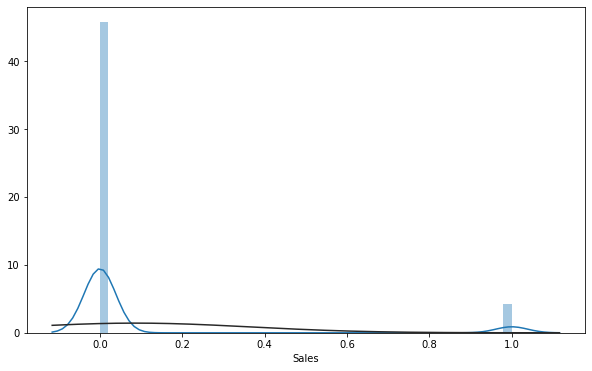

In [39]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['Sales'], fit=norm)

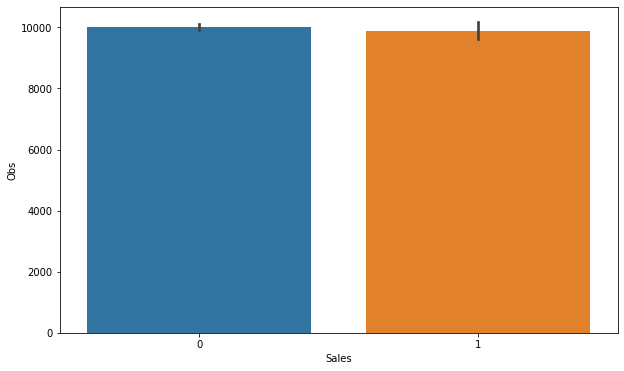

In [40]:
# Plot the distribution on Sales
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Sales", y="Obs", data=dataset[0])
plt.show()

In [41]:
# Check percentage of Sales=1 and NotSales=0 of entire first dataset
print("We have a total {0}% sales on total observations, that are {1} customers.".format(
    round(sum(dataset[0]['Sales']==1)/len(dataset[0]['Sales'])*100,2), len(dataset[0]['Sales'])))

We have a total 8.58% sales on total observations, that are 20000 customers.


* * *

#### `Price Sensitivity`

In [42]:
print("The third variable to examine will be {0}".format(columns1[2]))

The third variable to examine will be Price Sensitivity


In [43]:
# Description
data_0[2:3]

,Variable Name,Meaning
2,Price Sensitivity,It indicates the client's sensitivity to the p...


* * *

#### `PhoneType`

categorical variables described fixed or mobile phone.

In [44]:
print("The 4th variable to examine will be {0}".format(columns1[3]))

The 4th variable to examine will be PhoneType


In [45]:
# Description
data_0[3:4]

,Variable Name,Meaning
3,PhoneType,Client's phone type: Fixed or Mobile


In [46]:
# Evaluate PhoneType and Sales as absolute values
pd.crosstab(dataset[0]['PhoneType'], dataset[0]['Sales'])

Sales,0,1
PhoneType,,
FIXED / LAND PHONE,6730,508
MOBILE PHONE,11555,1207


In [47]:
# Evaluate PhoneType and Sales as relatives values on Sold only
dataset[0][["PhoneType", "Sales"]].groupby(['PhoneType'], 
                                           as_index=False).mean().sort_values(by='Sales', ascending=False)

,PhoneType,Sales
1,MOBILE PHONE,0.094578
0,FIXED / LAND PHONE,0.070185


In [48]:
# Evaluate PhoneType and Sales as relatives values on Sold only
dataset[0][["PhoneType", "Obs"]].groupby(['PhoneType'], 
                                         as_index=False).mean().sort_values(by='Obs', ascending=False)

,PhoneType,Obs
0,FIXED / LAND PHONE,10050.640508
1,MOBILE PHONE,9972.062686


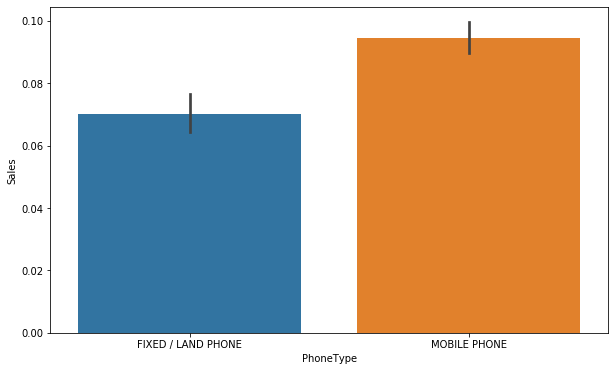

In [49]:
# Plot the distribution on Sales
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="PhoneType", y="Sales", data=dataset[0])
plt.show()

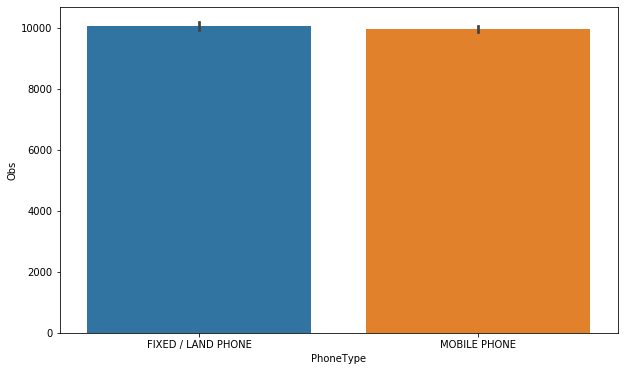

In [50]:
# Plot the distribution on Customers
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="PhoneType", y="Obs", data=dataset[0])
plt.show()

* * *

#### `Email`

boolean variables described if email is available == 1 or not == 0

In [51]:
print("The 5th variable to examine will be {0}".format(columns1[4]))

The 5th variable to examine will be Email


In [52]:
# Description
data_0[4:5]

,Variable Name,Meaning
4,Email,It indicates whether the client's email is ava...


In [53]:
# Evaluate Email and Sales as absolute values
pd.crosstab(dataset[0]['Email'], dataset[0]['Sales'])

Sales,0,1
Email,,
0,17509,1002
1,776,713


In [54]:
# Evaluate Email and Sales as relatives values on Sold only
dataset[0][["Email", "Sales"]].groupby(['Email'], as_index=False).mean()

,Email,Sales
0,0,0.054130
1,1,0.478845


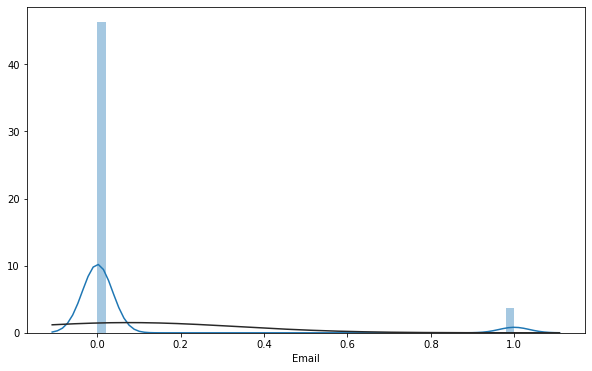

In [55]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['Email'], fit=norm)

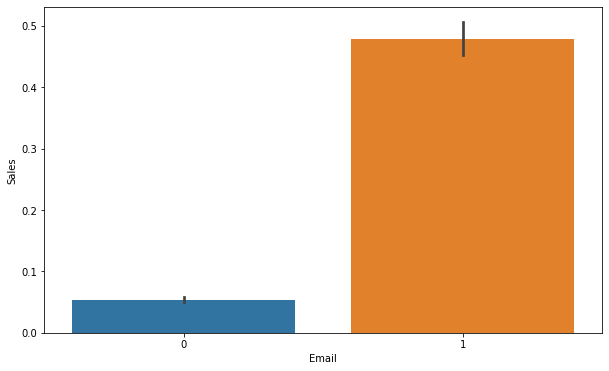

In [56]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Email", y="Sales", data=dataset[0])
plt.show()

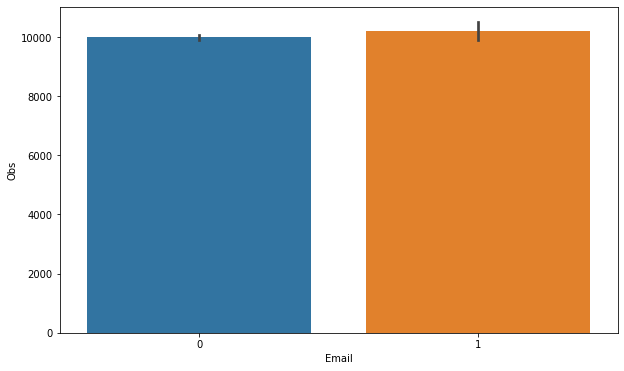

In [57]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Email", y="Obs", data=dataset[0])
plt.show()

* * *

#### `Tenure`

continous numerical variable described years when the person became a client of the company. We can determinate years in numerical cont. from specific date later.

In [58]:
print("The 6th variable to examine will be {0}".format(columns1[5]))

The 6th variable to examine will be Tenure


In [59]:
# Description
data_0[5:6]

,Variable Name,Meaning
5,Tenure,Client's tenure (year when the person became a...


In [60]:
# Evaluate Tenure and Sales as absolute values
pd.crosstab(dataset[0]['Tenure'], dataset[0]['Sales'])

Sales,0,1
Tenure,,
1990,345,21
1991,342,28
1992,316,21
1993,343,20
1994,315,27
1995,328,32
1996,334,25
1997,320,26
1998,314,15


In [61]:
# Evaluate Tenure and Sales as relatives values on Sold only
dataset[0][["Tenure", "Sales"]].groupby(['Tenure'], as_index=False).mean()

,Tenure,Sales
0,1990,0.057377
1,1991,0.075676
2,1992,0.062315
3,1993,0.055096
4,1994,0.078947
5,1995,0.088889
6,1996,0.069638
7,1997,0.075145
8,1998,0.045593
9,1999,0.056604


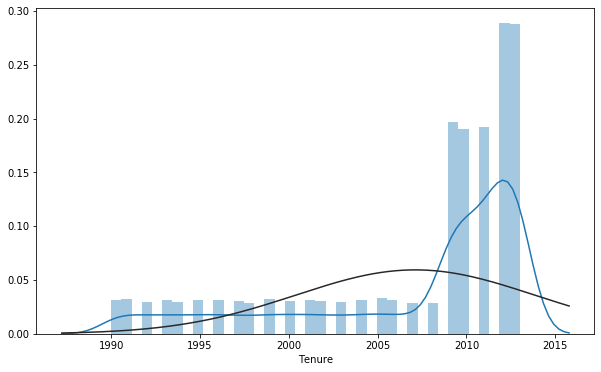

In [62]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['Tenure'], 
             fit=norm )

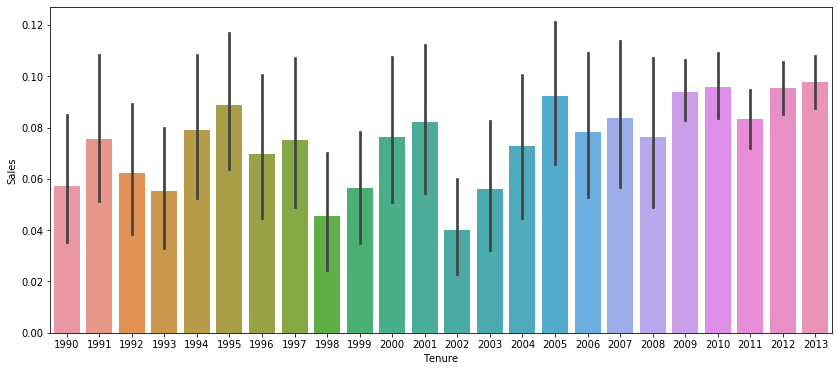

In [63]:
# Plot the distribution
plt.figure(figsize= [14.0, 6.0])
sns.barplot(x="Tenure", y="Sales", data=dataset[0])
plt.show()

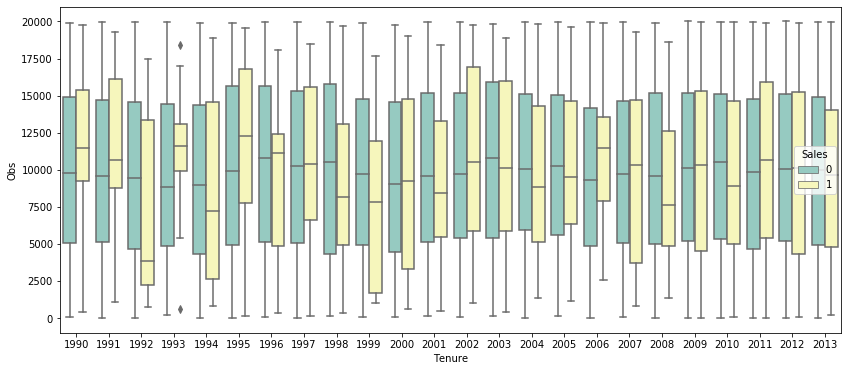

In [64]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Tenure", y="Obs", hue="Sales", data=dataset[0], palette="Set3")
plt.show()


In [65]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Tenure"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Tenure,,,
1990,345,21,366
1991,342,28,370
1992,316,21,337
1993,343,20,363
1994,315,27,342
1995,328,32,360
1996,334,25,359
1997,320,26,346
1998,314,15,329


* * *

#### `NumberofCampaigns`

discrete variables described how many times client has been called

In [66]:
print("The 6th variable to examine will be {0}".format(columns1[6]))

The 6th variable to examine will be NumberofCampaigns


In [67]:
# Description
data_0[6:7]

,Variable Name,Meaning
6,NumberofCampaigns,Number of times the client has been called


In [68]:
# Evaluate NumberofCampaigns and Sales as absolute values
pd.crosstab(index=dataset[0]["NumberofCampaigns"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
NumberofCampaigns,,,
2,12582,1134,13716
4,2361,158,2519
6,2411,259,2670
8,58,10,68
10,57,10,67
12,61,8,69
14,70,12,82
16,108,25,133
18,152,24,176


In [69]:
# Evaluate NumberofCampaigns and Sales as relatives values on Sold only
dataset[0][["NumberofCampaigns", "Sales"]].groupby(['NumberofCampaigns'], as_index=False).mean()

,NumberofCampaigns,Sales
0,2,0.082677
1,4,0.062723
2,6,0.097004
3,8,0.147059
4,10,0.149254
5,12,0.115942
6,14,0.146341
7,16,0.187970
8,18,0.136364
9,20,0.239583


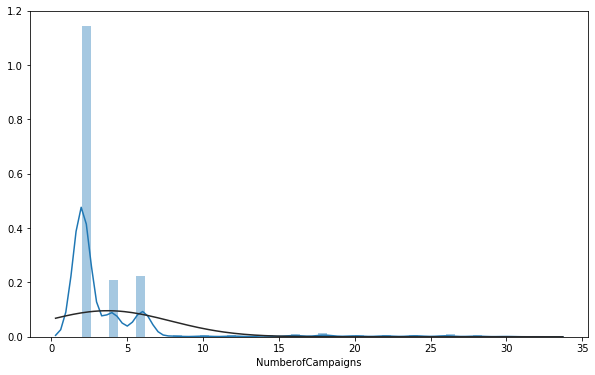

In [70]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['NumberofCampaigns'], 
             fit=norm )

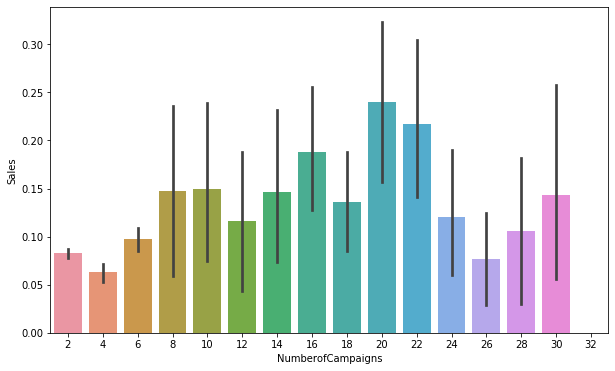

In [71]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="NumberofCampaigns", y="Sales", data=dataset[0])
plt.show()

* * *

#### `ProdActive`

discrete variables described how many active products have a client.

In [72]:
columns1

Index(['Obs', 'Sales', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
       'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Premium Offered',
       'Phone Call Day', 'CodeCategory', 'Birthdate', 'Product Type',
       'Number of Semesters Paid', 'Socieconomic Status', 'Province',
       'Right Address', 'Living Area (m^2)', 'House Price', 'Income',
       'yearBuilt', 'House Insurance', 'Pension Plan',
       'Estimated number of cars', 'Probability of Second Residence', 'Credit',
       'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices', 'Type of House'],
      dtype='object')

In [73]:
print("The 7th variable to examine will be {0}".format(columns1[7]))

The 7th variable to examine will be ProdActive


In [74]:
# Description
data_0[7:8]

,Variable Name,Meaning
7,ProdActive,Number of active products


In [75]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["ProdActive"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
ProdActive,,,
0,18061,1005,19066
1,193,667,860
2,30,38,68
3,1,5,6
All,18285,1715,20000


In [76]:
# Evaluate ProdActive and Sales as relatives values on Sold only
dataset[0][["ProdActive", "Sales"]].groupby(['ProdActive'], as_index=False).mean()

,ProdActive,Sales
0,0,0.052712
1,1,0.775581
2,2,0.558824
3,3,0.833333


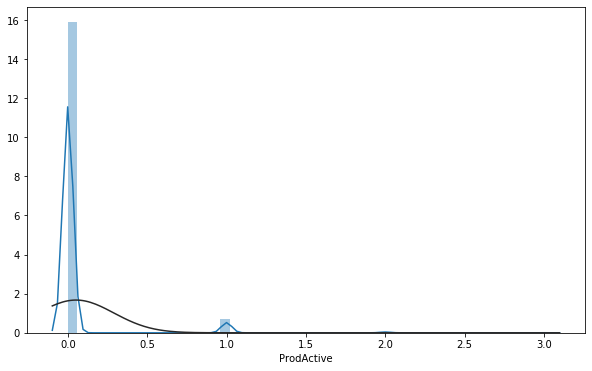

In [77]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['ProdActive'], 
             fit=norm )

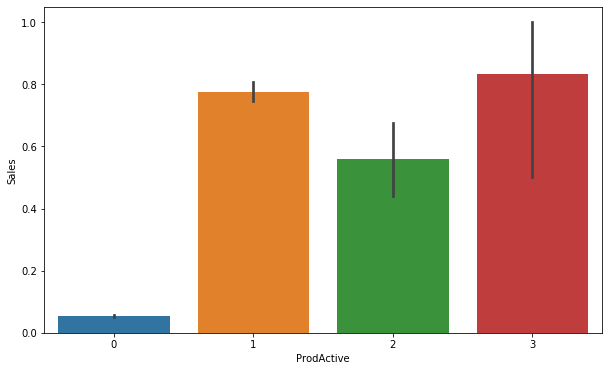

In [78]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="ProdActive", y="Sales", data=dataset[0])
plt.show()

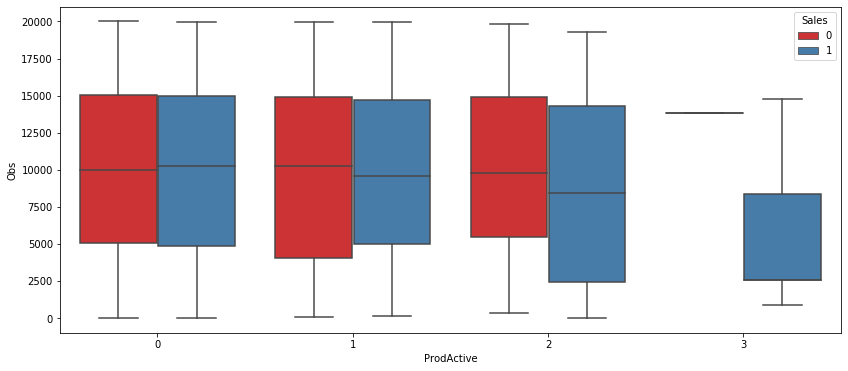

In [79]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="ProdActive", y="Obs", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `ProdBought`

discrete variables described how many product client had bought

In [80]:
print("The 8th variable to examine will be {0}".format(columns1[8]))

The 8th variable to examine will be ProdBought


In [81]:
# Description
data_0[8:9]

,Variable Name,Meaning
8,ProdBought,Number of different products previously bought


In [82]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["ProdBought"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
ProdBought,,,
0,15546,0,15546
1,1778,1417,3195
2,556,167,723
3,302,95,397
4,91,33,124
5,12,2,14
6,0,1,1
All,18285,1715,20000


In [83]:
# Evaluate ProdBought and Sales as relatives values on Sold only
dataset[0][["ProdBought", "Sales"]].groupby(['ProdBought'], as_index=False).mean()

,ProdBought,Sales
0,0,0.000000
1,1,0.443505
2,2,0.230982
3,3,0.239295
4,4,0.266129
5,5,0.142857
6,6,1.000000


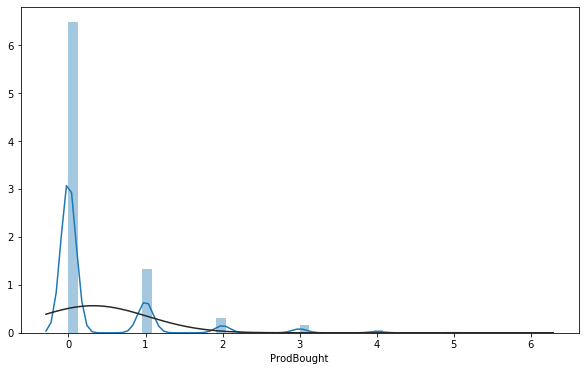

In [84]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['ProdBought'], 
             fit=norm )

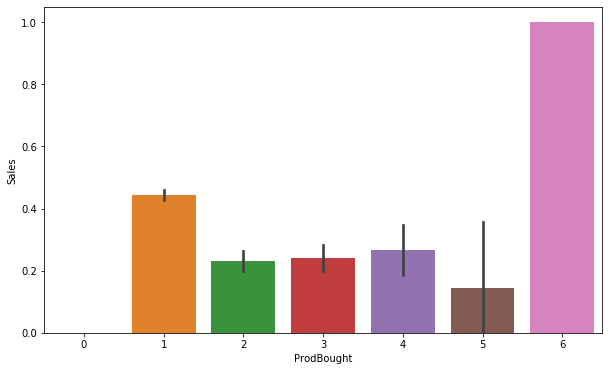

In [85]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="ProdBought", y="Sales", data=dataset[0])
plt.show()

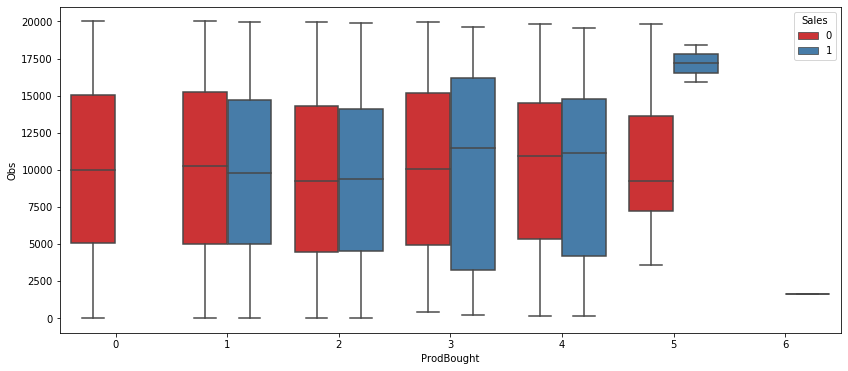

In [86]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="ProdBought", y="Obs", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Premium Offered`

boolean variables described premium offered to the client.

In [87]:
print("The 8th variable to examine will be {0}".format(columns1[9]))

The 8th variable to examine will be Premium Offered


In [88]:
# Description
data_0[9:10]

,Variable Name,Meaning
9,Premium Offered,Premium offered to the client


In [89]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Premium Offered"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Premium Offered,,,
11.12,6585,615,7200
14.5,10383,924,11307
21.85,1317,176,1493
All,18285,1715,20000


In [90]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Premium Offered", "Sales"]].groupby(['Premium Offered'], as_index=False).mean()

,Premium Offered,Sales
0,11.12,0.085417
1,14.50,0.081719
2,21.85,0.117883


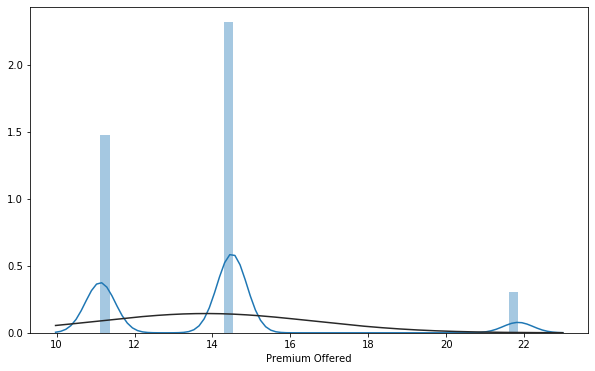

In [91]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['Premium Offered'], 
             fit=norm )

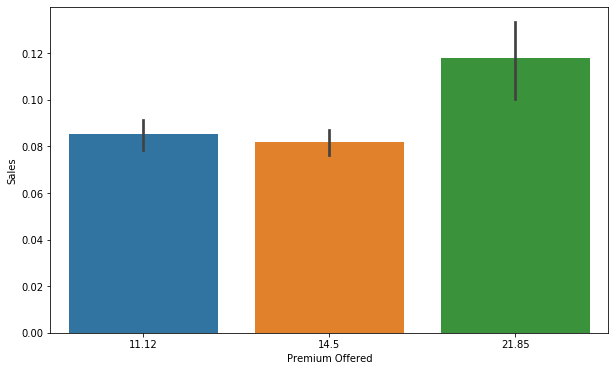

In [92]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Premium Offered", y="Sales", data=dataset[0])
plt.show()

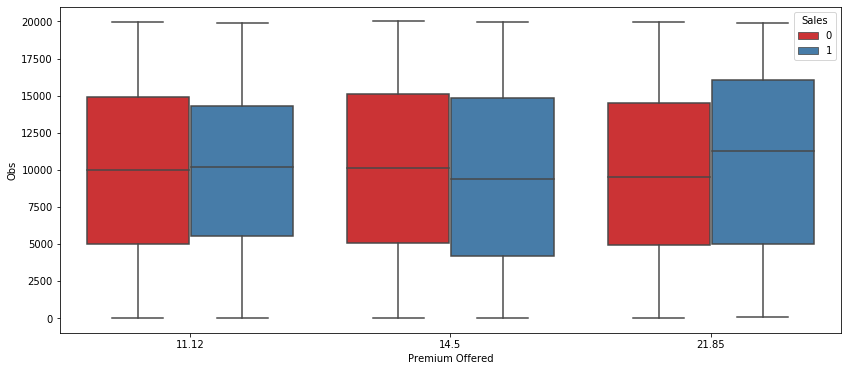

In [93]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Premium Offered", y="Obs", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

In [94]:
dataset[0]['Sales'].value_counts()

0    18285
1     1715
Name: Sales, dtype: int64

In [95]:
not_sales = dataset[0]['Sales'].value_counts()[0]
sales = dataset[0]['Sales'].value_counts()[1]
total_sales = not_sales + sales
print("Total of sales is {}".format(float(sales/total_sales)*100))

Total of sales is 8.575000000000001


* * *

#### `Phone Call Day`

categorical variable indicate day of the week when client was called.

In [96]:
columns1

Index(['Obs', 'Sales', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
       'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Premium Offered',
       'Phone Call Day', 'CodeCategory', 'Birthdate', 'Product Type',
       'Number of Semesters Paid', 'Socieconomic Status', 'Province',
       'Right Address', 'Living Area (m^2)', 'House Price', 'Income',
       'yearBuilt', 'House Insurance', 'Pension Plan',
       'Estimated number of cars', 'Probability of Second Residence', 'Credit',
       'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices', 'Type of House'],
      dtype='object')

In [97]:
print("The 9th variable to examine will be {0}".format(columns1[10]))

The 9th variable to examine will be Phone Call Day


In [98]:
# Description
data_0[10:11]

,Variable Name,Meaning
10,Phone Call Day,Day the phone call is received


In [99]:
dataset[0]['Phone Call Day'].value_counts()

Monday       4385
Thrusday     4271
Tuesday      4124
Wednesday    4025
Friday       2968
Sunday        227
Name: Phone Call Day, dtype: int64

> It seems there is an error with weekday name `Thrusday` instead **Thursday**, we fix it. And miss Saturday, so we check it in null values.

In [100]:
dataset[0]['Phone Call Day'] = dataset[0]['Phone Call Day'].str.replace('Thrusday','Thursday')
dataset[0]['Phone Call Day'].head(20)

0     Wednesday
1      Thursday
2      Thursday
3     Wednesday
4     Wednesday
5      Thursday
6       Tuesday
7        Friday
8      Thursday
9        Sunday
10       Monday
11    Wednesday
12     Thursday
13       Monday
14       Monday
15    Wednesday
16       Monday
17       Monday
18      Tuesday
19     Thursday
Name: Phone Call Day, dtype: object

In [101]:
# Check null observations
sum(dataset[0]['Phone Call Day'].isnull())

0

We haven't null observations, so we haven't Saturday.

In [102]:
dataset[0]['new_PhoneCallDay'] = pd.Categorical(dataset[0]['Phone Call Day'],
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

In [103]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["new_PhoneCallDay"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
new_PhoneCallDay,,,
Monday,4042,343,4385
Tuesday,3743,381,4124
Wednesday,3653,372,4025
Thursday,3901,370,4271
Friday,2719,249,2968
Sunday,227,0,227
All,18285,1715,20000


In [104]:
# Evaluate Phone Call Day and Sales as relatives values on sold only
dataset[0][["new_PhoneCallDay", "Sales"]].groupby(['new_PhoneCallDay'], as_index=False).mean()

,new_PhoneCallDay,Sales
0,Monday,0.078221
1,Tuesday,0.092386
2,Wednesday,0.092422
3,Thursday,0.086631
4,Friday,0.083895
5,Saturday,NaN
6,Sunday,0.000000


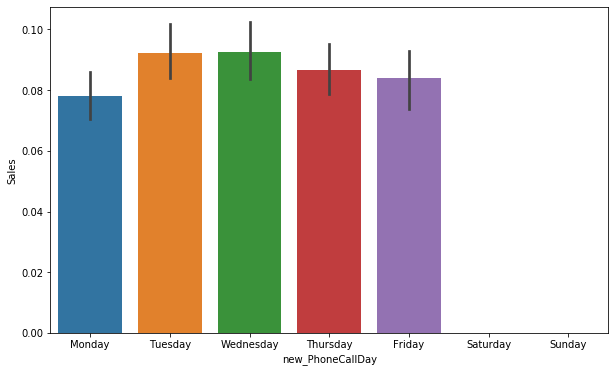

In [105]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="new_PhoneCallDay", y="Sales", data=dataset[0])
plt.show()

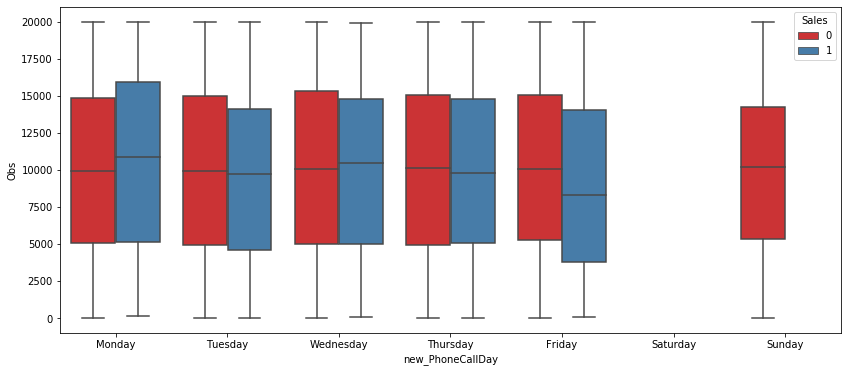

In [106]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="new_PhoneCallDay", y="Obs", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `CodeCategory`

categorical variable that describe category of the phone call answer

In [107]:
print("The 10th variable to examine will be {0}".format(columns1[11]))

The 10th variable to examine will be CodeCategory


In [108]:
# Description
data_0[11:12]

,Variable Name,Meaning
11,CodeCategory,Category of the phone call answer


In [109]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["CodeCategory"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
CodeCategory,,,
Cancelled Sale,11,0,11
Ineligible,2410,0,2410
No Longer a Costumer,1164,0,1164
Not Call,733,0,733
Not Interested,13705,0,13705
Refusal,262,0,262
Sale,0,1715,1715
All,18285,1715,20000


In [110]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["CodeCategory", "Sales"]].groupby(['CodeCategory'], as_index=False).mean()

,CodeCategory,Sales
0,Cancelled Sale,0
1,Ineligible,0
2,No Longer a Costumer,0
3,Not Call,0
4,Not Interested,0
5,Refusal,0
6,Sale,1


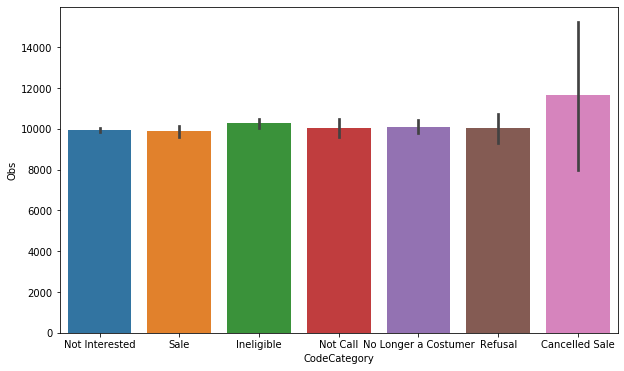

In [111]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="CodeCategory", y="Obs", data=dataset[0])
plt.show()

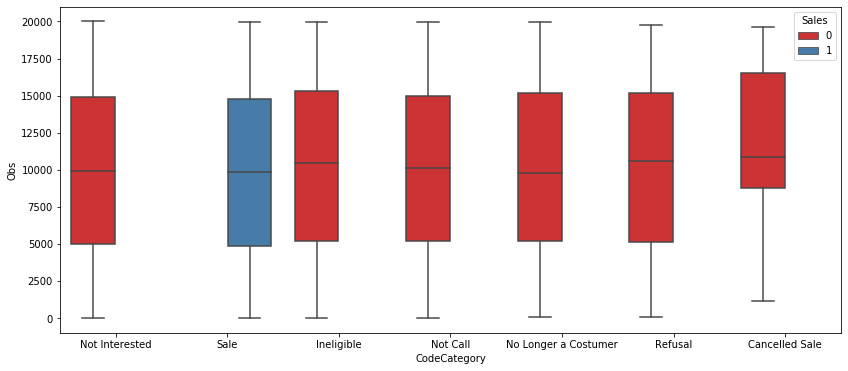

In [112]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="CodeCategory", y="Obs", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

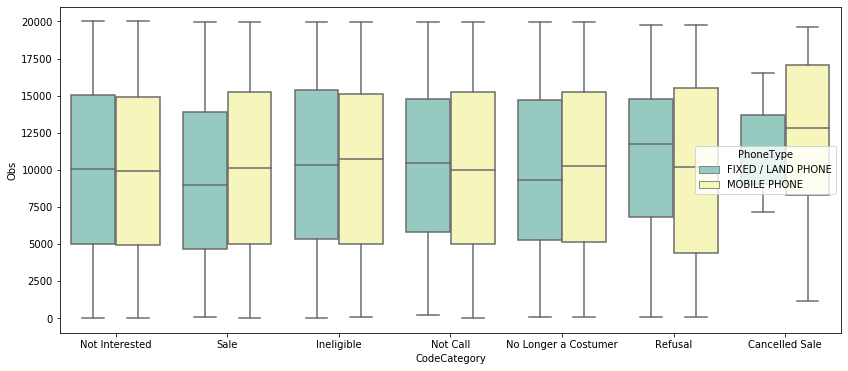

In [113]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="CodeCategory", y="Obs", hue="PhoneType", 
            data=dataset[0], palette="Set3", )
plt.show()

* * *

#### `Birthdate`

numerical variables indicate year of birthdate of the client. We can transform later to determinate years'old.

In [114]:
print("The 11th variable to examine will be {0}".format(columns1[12]))

The 11th variable to examine will be Birthdate


In [115]:
# Description
data_0[12:13]

,Variable Name,Meaning
12,Birthdate,Client's birthdate


In [116]:
# Evaluate Premium Offered and Sales as absolute values
pd.crosstab(dataset[0]['Birthdate'], dataset[0]['Sales'])

Sales,0,1
Birthdate,,
1944.0,165,30
1945.0,150,20
1946.0,144,31
1947.0,156,27
1948.0,131,20
1949.0,145,26
1950.0,144,23
1951.0,141,20
1952.0,132,28


In [117]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Birthdate", "Sales"]].groupby(['Birthdate'], as_index=False).mean()

,Birthdate,Sales
0,1944.0,0.153846
1,1945.0,0.117647
2,1946.0,0.177143
3,1947.0,0.147541
4,1948.0,0.132450
5,1949.0,0.152047
6,1950.0,0.137725
7,1951.0,0.124224
8,1952.0,0.175000
9,1953.0,0.150838


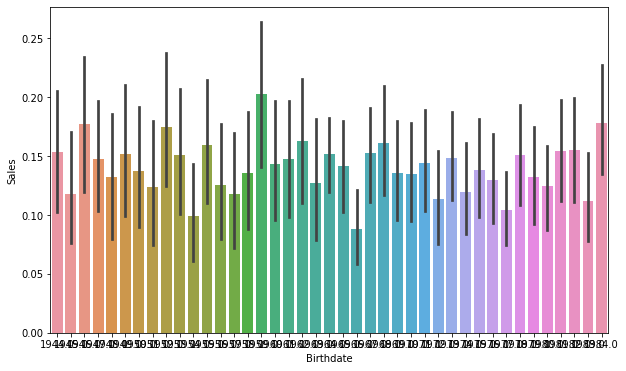

In [118]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Birthdate", y="Sales", data=dataset[0])
plt.show()

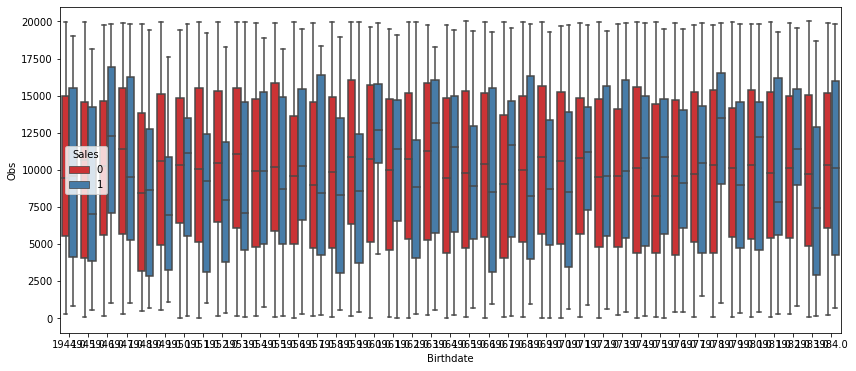

In [119]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Birthdate", y="Obs", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Product Type`

categorical variable indicate type of product that the client buys.

In [120]:
print("The 12th variable to examine will be {0}".format(columns1[13]))

The 12th variable to examine will be Product Type


In [121]:
# Description
data_0[13:14]

,Variable Name,Meaning
13,Product Type,It indicates the type of product that the clie...


In [122]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Product Type"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Product Type,,,
0,18285,0,18285
A,0,1153,1153
B,0,562,562
All,18285,1715,20000


In [123]:
# Evaluate the frequency of products.
dataset[0]['Product Type'].value_counts()/len(dataset[0])*100

0    91.425
A     5.765
B     2.810
Name: Product Type, dtype: float64

In [124]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Product Type", "Sales"]].groupby(['Product Type'], as_index=False).mean()

,Product Type,Sales
0,0,0
1,A,1
2,B,1


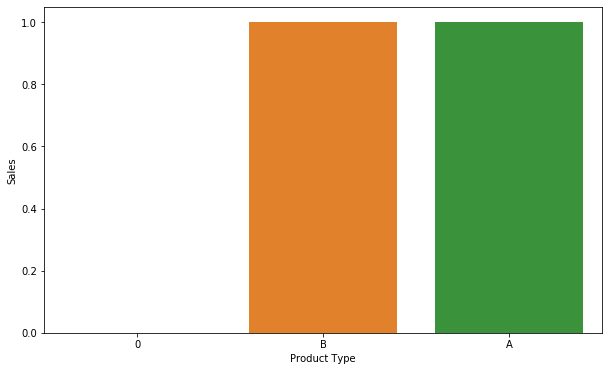

In [125]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Product Type", y="Sales", data=dataset[0])
plt.show()

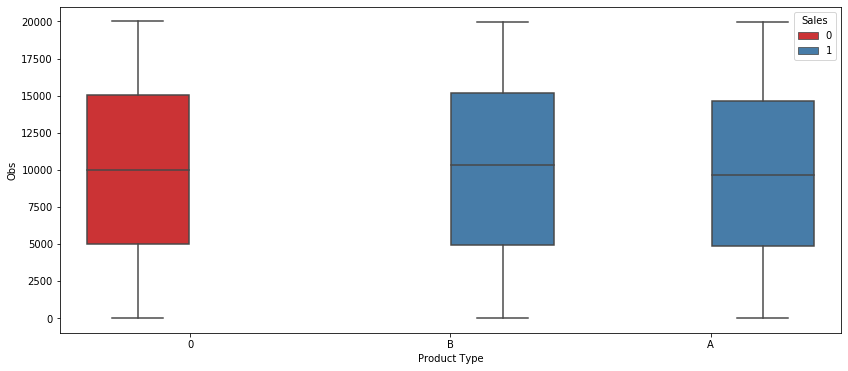

In [126]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Product Type", y="Obs", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

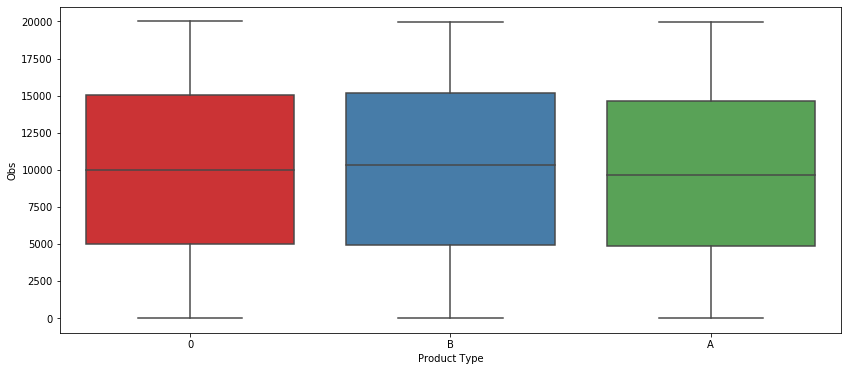

In [127]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Product Type", y="Obs", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Number of Semesters Paid`

like as categorical variables indicate number of semesters paid.

In [128]:
print("The 13th variable to examine will be {0}".format(columns1[14]))

The 13th variable to examine will be Number of Semesters Paid


In [129]:
# Description
data_0[14:15]

,Variable Name,Meaning
14,Number of Semesters Paid,Number of semesters paid


In [130]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Number of Semesters Paid"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,1,All
Number of Semesters Paid,,
0.0,634,634
1.5,93,93
3.0,425,425
4.5,563,563
All,1715,1715


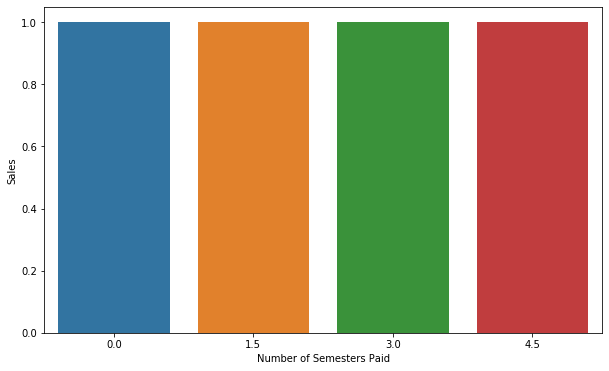

In [131]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Number of Semesters Paid", y="Sales", data=dataset[0])
plt.show()

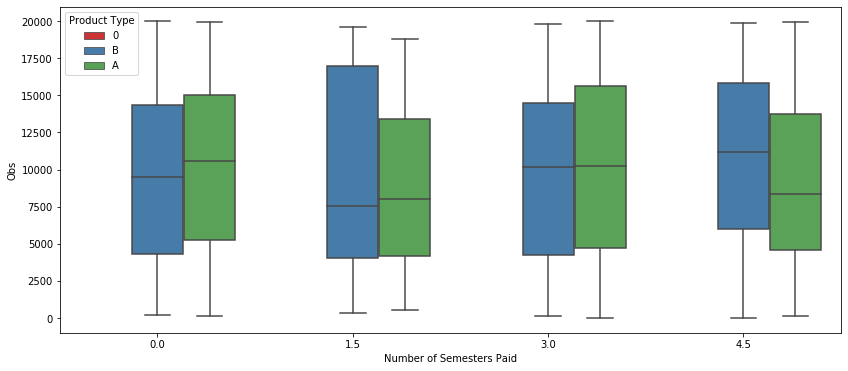

In [132]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Number of Semesters Paid", y="Obs", hue="Product Type", data=dataset[0], palette="Set1")
plt.show()

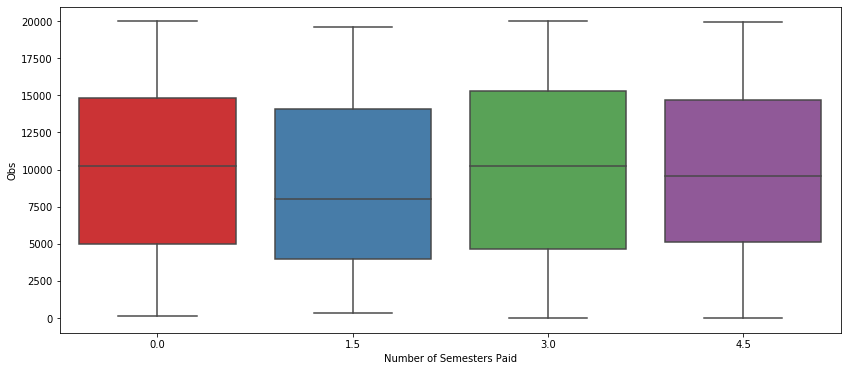

In [133]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Number of Semesters Paid", y="Obs", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Socieconomic Status`

categorical variable indicates status of customer.

In [134]:
print("The 14th variable to examine will be {0}".format(columns1[15]))

The 14th variable to examine will be Socieconomic Status


In [135]:
# Description
data_0[15:16]

,Variable Name,Meaning
15,Socieconomic Status,It indicates the client's socieconomic status


In [136]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Socieconomic Status"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Socieconomic Status,,,
High,708,162,870
Low,5101,234,5335
Medium,9850,1112,10962
Very High,643,206,849
All,16302,1714,18016


In [137]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Socieconomic Status", "Sales"]].groupby(['Socieconomic Status'], as_index=False).mean()

,Socieconomic Status,Sales
0,High,0.186207
1,Low,0.043861
2,Medium,0.101441
3,Very High,0.242638


In [138]:
# Calculate the frequency by Status
dataset[0]['Socieconomic Status'].value_counts()/len(dataset[0])*100

Medium       54.810
Low          26.675
High          4.350
Very High     4.245
Name: Socieconomic Status, dtype: float64

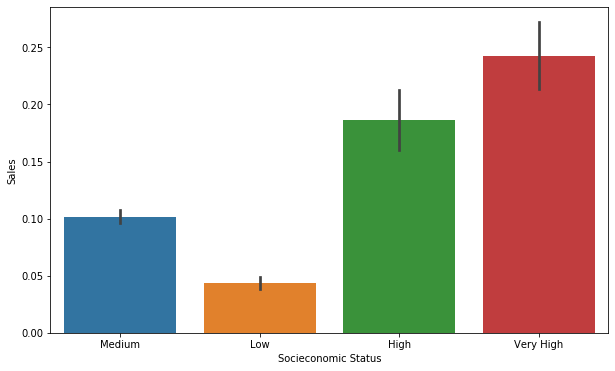

In [139]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Socieconomic Status", y="Sales", data=dataset[0])
plt.show()

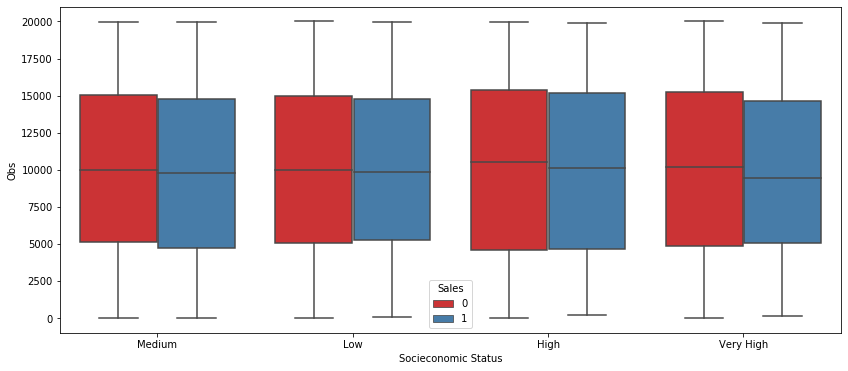

In [140]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Socieconomic Status", y="Obs", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

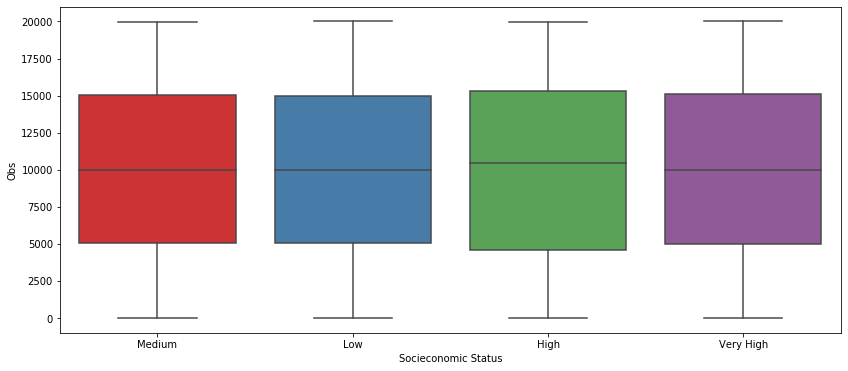

In [141]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Socieconomic Status", y="Obs", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Province`

categorical variable indicates provinces where the client lives. Specifically are provinces in `Spain`.

In [142]:
print("The 15th variable to examine will be {0}".format(columns1[16]))

The 15th variable to examine will be Province


In [143]:
# Description
data_0[16:17]

,Variable Name,Meaning
16,Province,Province where the client lives


In [144]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Province"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Province,,,
A,281,19,300
AL,739,86,825
AS,115,8,123
AV,80,11,91
BA,3431,396,3827
BU,119,12,131
CA,965,91,1056
CI,80,13,93
CO,443,50,493


In [145]:
# Calculate the frequency by Province
dataset[0]['Province'].value_counts()/len(dataset[0])*100

BA    19.135
MA    15.200
SE     5.345
CA     5.280
VA     4.295
AL     4.125
ZA     3.490
SA     3.160
LA     2.855
CO     2.465
GR     2.360
TA     2.085
HU     2.015
GI     1.850
GU     1.655
JA     1.625
A      1.500
MU     1.500
LL     1.070
TO     0.985
VI     0.885
LE     0.875
LU     0.850
BU     0.655
AS     0.615
PO     0.545
TE     0.540
PA     0.530
CI     0.465
AV     0.455
OU     0.355
CU     0.305
SO     0.160
ME     0.010
Name: Province, dtype: float64

In [146]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Province", "Sales"]].groupby(['Province'], as_index=True).mean()

,Sales
Province,
A,0.063333
AL,0.104242
AS,0.065041
AV,0.120879
BA,0.103475
BU,0.091603
CA,0.086174
CI,0.139785
CO,0.101420


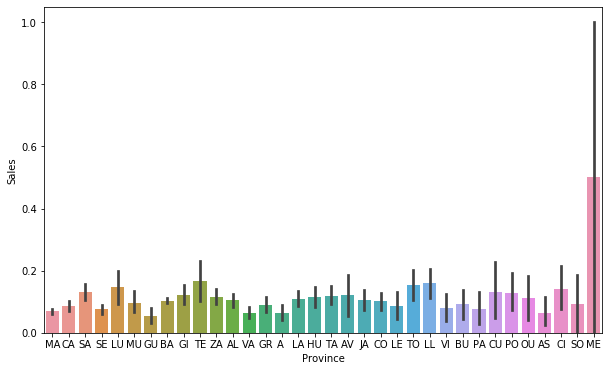

In [147]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Province", y="Sales", data=dataset[0])
plt.show()

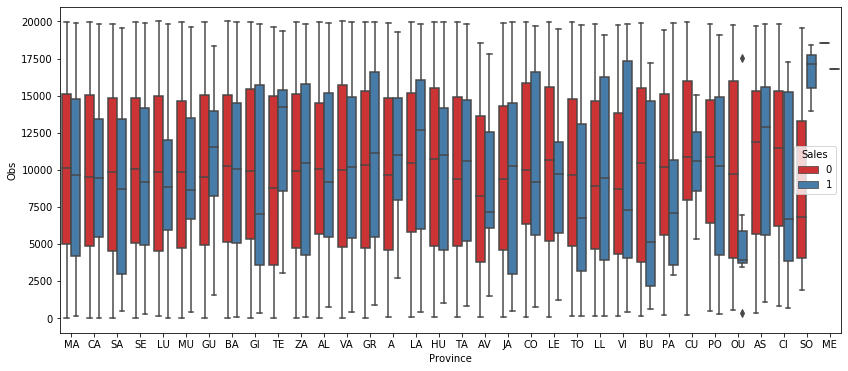

In [148]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Province", y="Obs", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

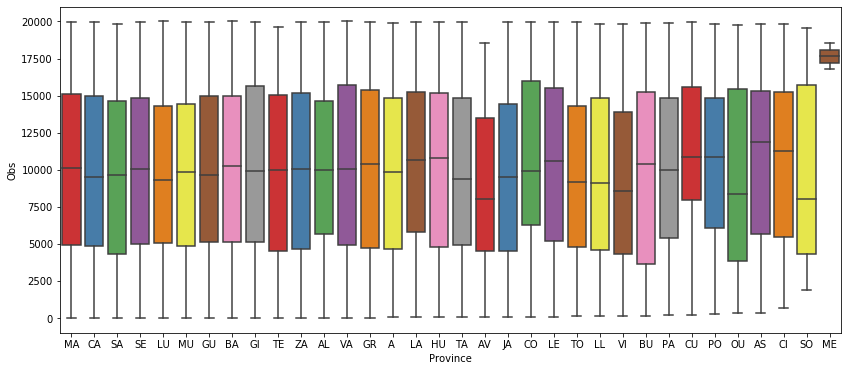

In [149]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Province", y="Obs", data=dataset[0], palette="Set1")
plt.show()

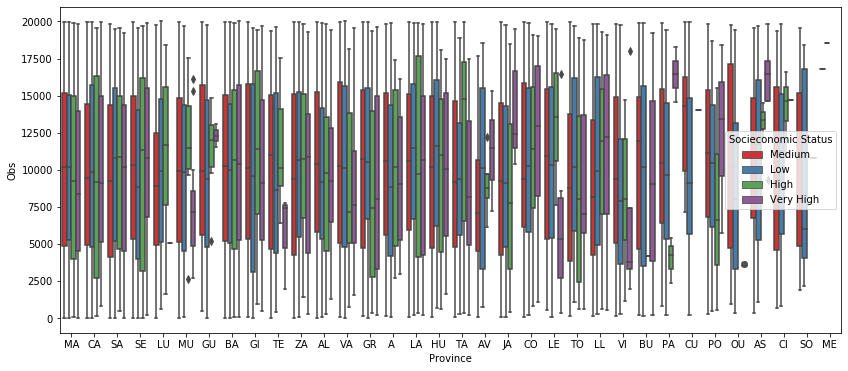

In [150]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Province", y="Obs", hue="Socieconomic Status", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Right Address`

categorical variables indicates whether the client's address is correct or not.

In [151]:
print("The 16th variable to examine will be {0}".format(columns1[17]))

The 16th variable to examine will be Right Address


In [152]:
# Description
data_0[17:18]

,Variable Name,Meaning
17,Right Address,It indicates whether the client's address is c...


In [153]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Right Address"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Right Address,,,
Right,15657,1547,17204
Wrong,645,167,812
All,16302,1714,18016


In [154]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Right Address", "Sales"]].groupby(['Right Address'], as_index=False).mean()

,Right Address,Sales
0,Right,0.089921
1,Wrong,0.205665


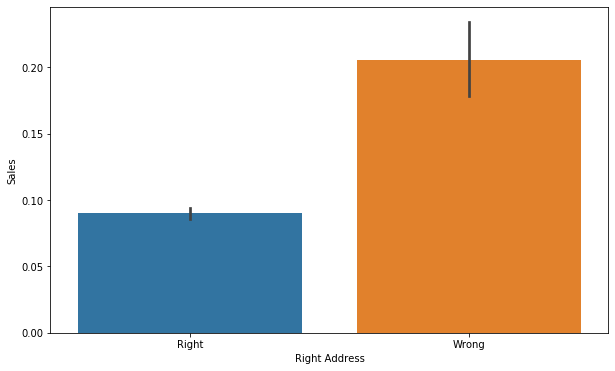

In [155]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Right Address", y="Sales", data=dataset[0])
plt.show()

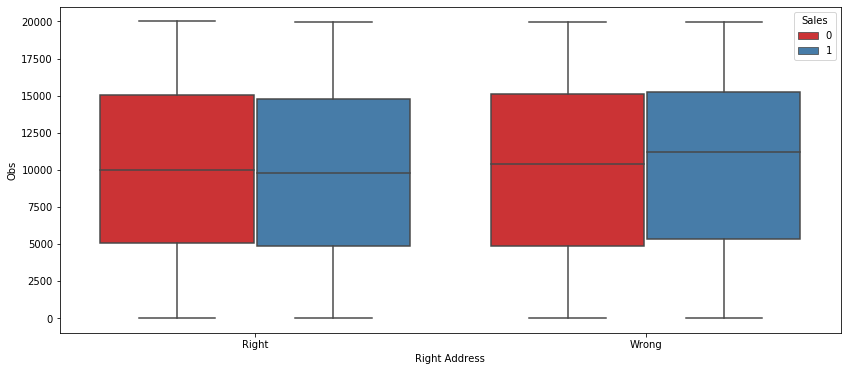

In [156]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Right Address", y="Obs", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

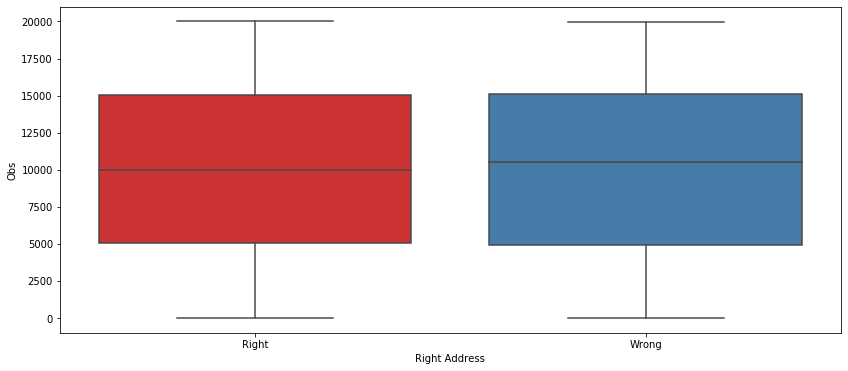

In [157]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Right Address", y="Obs", data=dataset[0], palette="Set1")
plt.show()

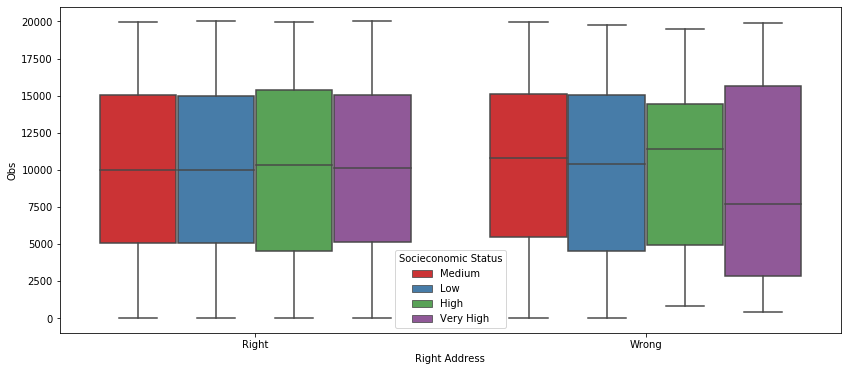

In [158]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Right Address", y="Obs", hue="Socieconomic Status", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Living Area (m^2)`

continous variable estimated surface area of house

In [159]:
print("The 17th variable to examine will be {0}".format(columns1[18]))

The 17th variable to examine will be Living Area (m^2)


In [160]:
# Description
data_0[18:19]

,Variable Name,Meaning
18,Living Area (m^2),Estimated surface area of house


In [161]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Living Area (m^2)"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Living Area (m^2),,,
0.0,27,2,29
0.0032400000000001317,1,0,1
0.5124400000000001,1,0,1
2.8976400000000004,1,0,1
3.688240000000001,1,0,1
...,...,...,...
13475.659640000002,0,1,1
21764.899640000003,1,0,1
25392.27964,1,0,1


In [162]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Living Area (m^2)", "Sales"]].groupby(['Living Area (m^2)'], as_index=False).mean()

,Living Area (m^2),Sales
0,0.00000,0.068966
1,0.00324,0.000000
2,0.51244,0.000000
3,2.89764,0.000000
4,3.68824,0.000000
...,...,...
7137,12942.33964,0.000000
7138,13475.65964,1.000000
7139,21764.89964,0.000000
7140,25392.27964,0.000000


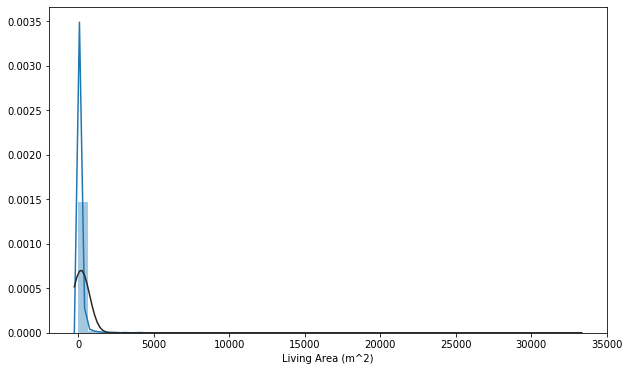

In [163]:
# Plot the distribution without null values
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['Living Area (m^2)'].dropna(), 
             fit=norm)

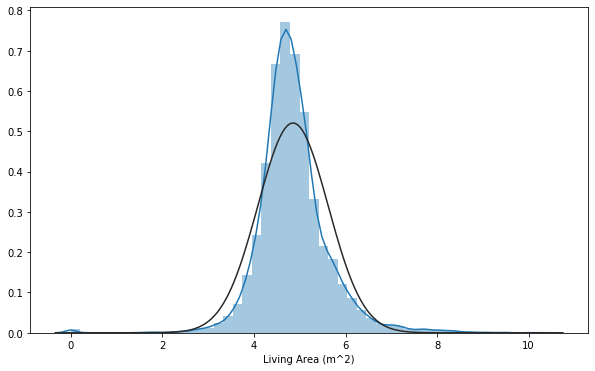

In [164]:
# Plot the distribution without null values rescaled by log1p
# Use log, log1p, log10, log2
plt.figure(figsize= [10.0, 6.0])
sns.distplot(np.log1p(dataset[0]['Living Area (m^2)']).dropna(), 
             fit=norm)

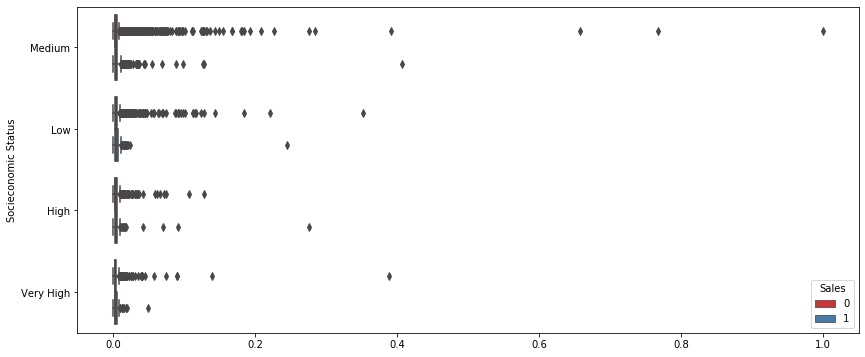

In [165]:
# Grouped boxplot

# Use MinMax Scale
xZ = minmax_scale(dataset[0]['Living Area (m^2)'])

plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x=xZ, y="Socieconomic Status", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `House Price`

cont. variable indicates price's estimation of the house

In [166]:
print("The 18th variable to examine will be {0}".format(columns1[19]))

The 18th variable to examine will be House Price


In [167]:
# Description
data_0[19:20]

,Variable Name,Meaning
19,House Price,Estimated price of the house


In [168]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["House Price"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
House Price,,,
9784.007415,1,0,1
12671.099414999997,1,0,1
14218.272314999998,0,1,1
14633.084115000001,1,0,1
14815.498814999999,1,0,1
...,...,...,...
4684124.670615,1,0,1
7548521.853015,1,0,1
9513130.418415,1,0,1


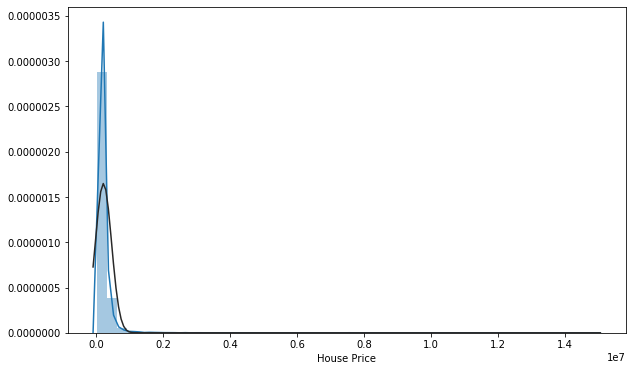

In [169]:
# Plot the distribution without null values
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['House Price'].dropna(), 
             fit=norm)

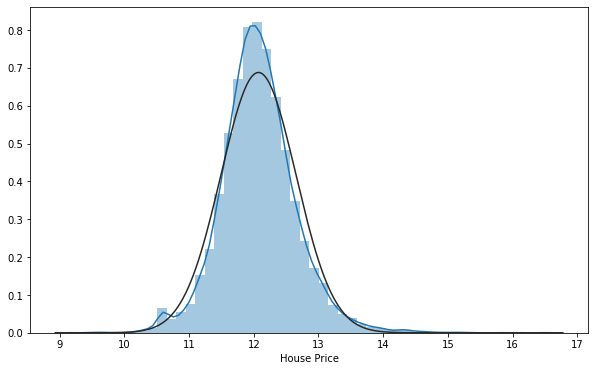

In [170]:
# Plot the distribution without null values by log1p
plt.figure(figsize= [10.0, 6.0])
sns.distplot(np.log1p(dataset[0]['House Price']).dropna(), 
             fit=norm)

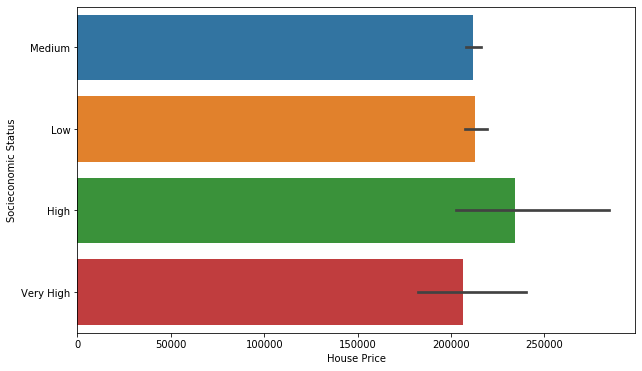

In [171]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="House Price", y="Socieconomic Status", data=dataset[0])
plt.show()

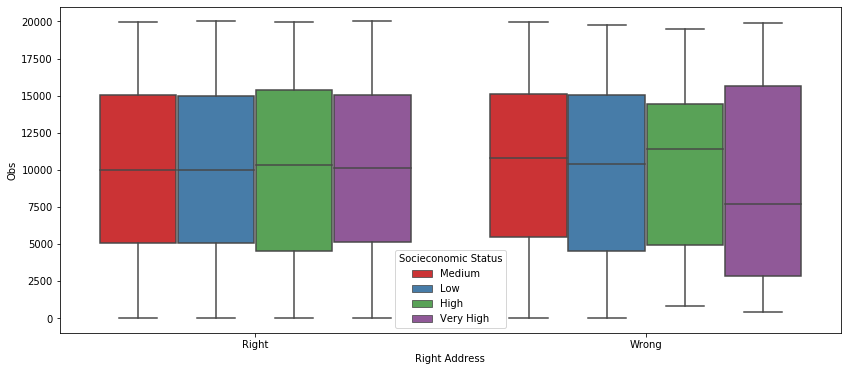

In [172]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Right Address", y="Obs", hue="Socieconomic Status", data=dataset[0], palette="Set1")
plt.show()

In [173]:
columns1

Index(['Obs', 'Sales', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
       'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Premium Offered',
       'Phone Call Day', 'CodeCategory', 'Birthdate', 'Product Type',
       'Number of Semesters Paid', 'Socieconomic Status', 'Province',
       'Right Address', 'Living Area (m^2)', 'House Price', 'Income',
       'yearBuilt', 'House Insurance', 'Pension Plan',
       'Estimated number of cars', 'Probability of Second Residence', 'Credit',
       'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices', 'Type of House'],
      dtype='object')

* * *

#### `Income`

cont. variable estimated income of the customer.

In [174]:
print("The 19th variable to examine will be {0}".format(columns1[20]))

The 19th variable to examine will be Income


In [175]:
# Description
data_0[20:21]

,Variable Name,Meaning
20,Income,Estimated income


In [176]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Income"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Income,,,
2190.8047140000003,1,0,1
2983.647114,0,1,1
3408.5317139999993,0,1,1
3522.435713999999,1,0,1
3572.533314,1,0,1
...,...,...,...
1285836.670314,1,0,1
2072444.1997139999,1,0,1
2611955.938914,1,0,1


In [177]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Income", "Sales"]].groupby(['Income'], as_index=False).mean()

,Income,Sales
0,2.190805e+03,0.0
1,2.983647e+03,1.0
2,3.408532e+03,1.0
3,3.522436e+03,0.0
4,3.572533e+03,0.0
...,...,...
14227,1.161481e+06,0.0
14228,1.285837e+06,0.0
14229,2.072444e+06,0.0
14230,2.611956e+06,0.0


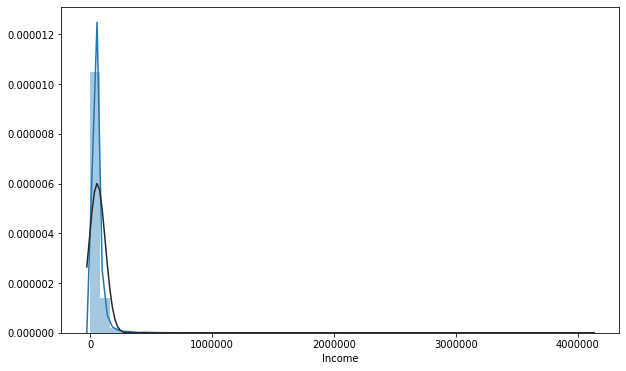

In [178]:
# Plot the distribution without null values
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['Income'].dropna(), 
             fit=norm)

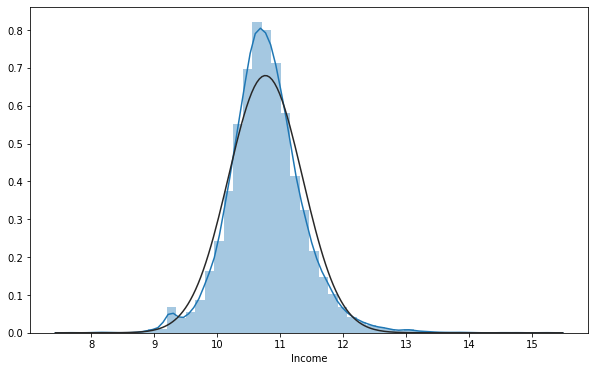

In [179]:
# Plot the distribution without null values by log1p
plt.figure(figsize= [10.0, 6.0])
sns.distplot(np.log1p(dataset[0]['Income']).dropna(), 
             fit=norm)

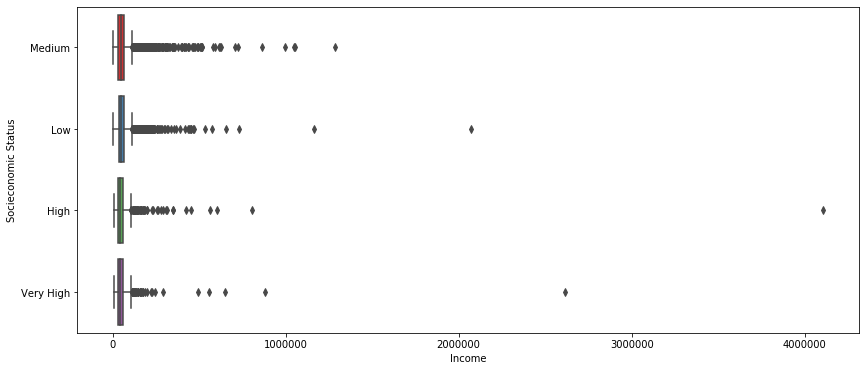

In [180]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Income", y="Socieconomic Status", data=dataset[0], palette="Set1")
plt.show()

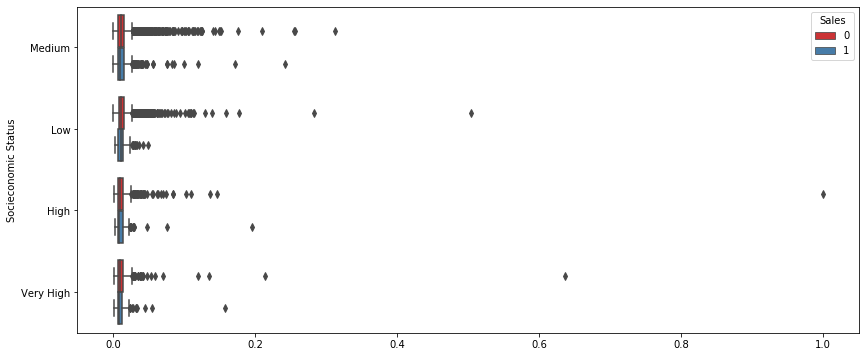

In [181]:
# Grouped boxplot

# Use MinMax Scale
xZ = minmax_scale(dataset[0]['Income'])

plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x=xZ, y="Socieconomic Status", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `yearBuilt`

discrete variable indicates when the client's house was built

In [182]:
print("The 21th variable to examine will be {0}".format(columns1[21]))

The 21th variable to examine will be yearBuilt


In [183]:
# Description
data_0[21:22]

,Variable Name,Meaning
21,yearBuilt,It indicates when the client's house was built


In [184]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["yearBuilt"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
yearBuilt,,,
1900.0,229,32,261
1901.0,3,2,5
1902.0,1,2,3
1903.0,2,0,2
1904.0,2,0,2
...,...,...,...
2009.0,282,23,305
2010.0,173,14,187
2011.0,77,15,92


In [185]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["yearBuilt", "Sales"]].groupby(['yearBuilt'], as_index=False).mean()

,yearBuilt,Sales
0,1900.0,0.122605
1,1901.0,0.400000
2,1902.0,0.666667
3,1903.0,0.000000
4,1904.0,0.000000
...,...,...
107,2008.0,0.073350
108,2009.0,0.075410
109,2010.0,0.074866
110,2011.0,0.163043


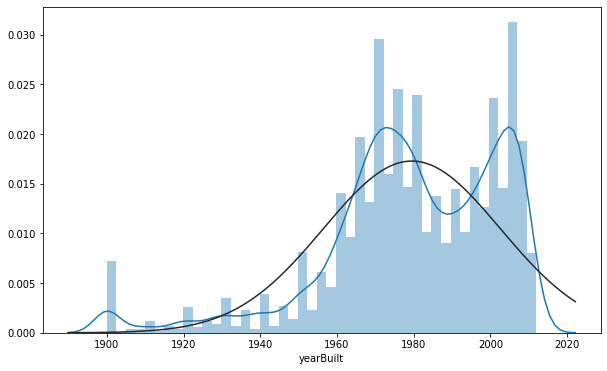

In [186]:
# Plot the distribution without null values
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['yearBuilt'].dropna(), 
             fit=norm)

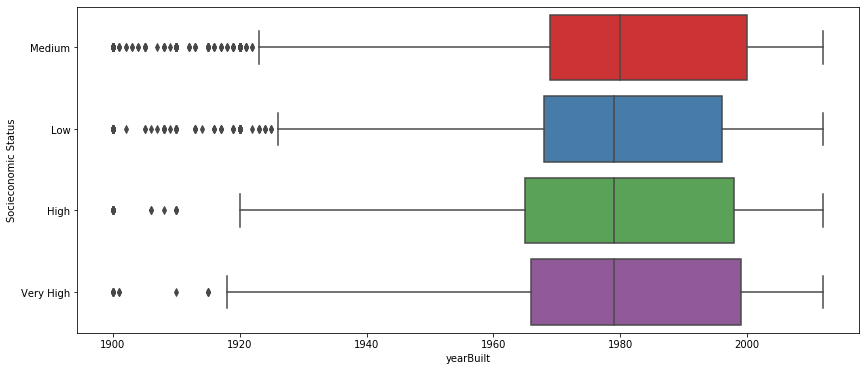

In [187]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="yearBuilt", y="Socieconomic Status", data=dataset[0], palette="Set1")
plt.show()

In [188]:
columns1

Index(['Obs', 'Sales', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
       'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Premium Offered',
       'Phone Call Day', 'CodeCategory', 'Birthdate', 'Product Type',
       'Number of Semesters Paid', 'Socieconomic Status', 'Province',
       'Right Address', 'Living Area (m^2)', 'House Price', 'Income',
       'yearBuilt', 'House Insurance', 'Pension Plan',
       'Estimated number of cars', 'Probability of Second Residence', 'Credit',
       'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices', 'Type of House'],
      dtype='object')

* * *

#### `House Insurance`

cont. variable indicates price of the house insurance.

In [189]:
print("The 21th variable to examine will be {0}".format(columns1[22]))

The 21th variable to examine will be House Insurance


In [190]:
# Description
data_0[22:23]

,Variable Name,Meaning
22,House Insurance,Price of the house insurance


In [191]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["House Insurance"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
House Insurance,,,
186.01379999999995,1,0,1
287.94780000000003,0,1,1
342.5778,0,1,1
357.21180000000004,1,0,1
363.6558,1,0,1
...,...,...,...
165226.1958,1,0,1
266361.44580000004,1,0,1
335727.2358,1,0,1


In [192]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["House Insurance", "Sales"]].groupby(['House Insurance'], as_index=False).mean()

,House Insurance,Sales
0,186.0138,0.0
1,287.9478,1.0
2,342.5778,1.0
3,357.2118,0.0
4,363.6558,0.0
...,...,...
14076,149237.5518,0.0
14077,165226.1958,0.0
14078,266361.4458,0.0
14079,335727.2358,0.0


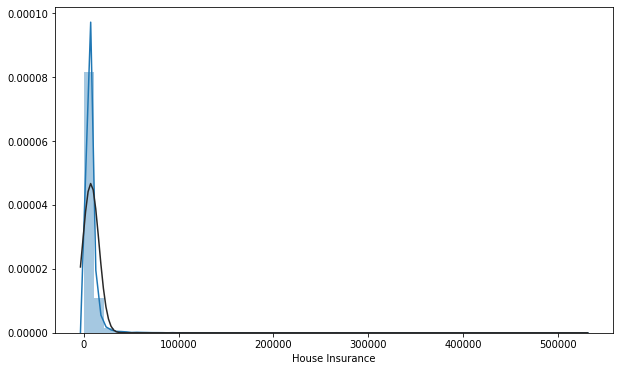

In [193]:
# Plot the distribution without null values
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['House Insurance'].dropna(), 
             fit=norm)

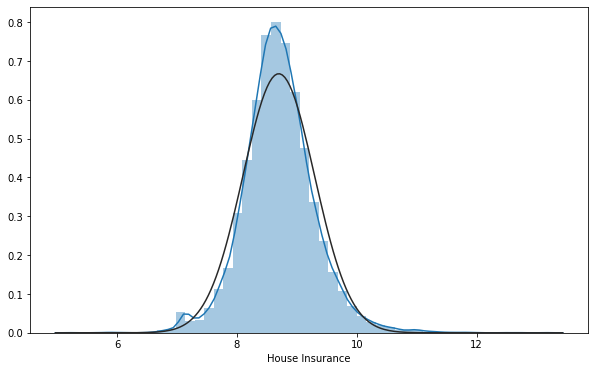

In [194]:
# Plot the distribution without null values by log1p
plt.figure(figsize= [10.0, 6.0])
sns.distplot(np.log1p(dataset[0]['House Insurance']).dropna(), 
             fit=norm)

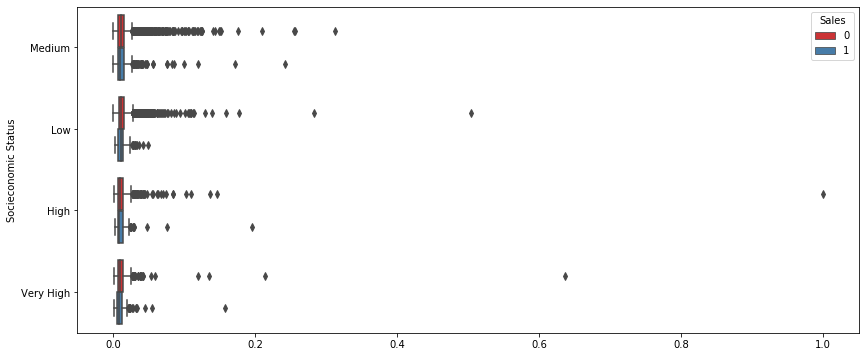

In [195]:
# Grouped boxplot

# Use MinMax Scale
xZ = minmax_scale(dataset[0]['House Insurance'])

plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x=xZ, y="Socieconomic Status", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

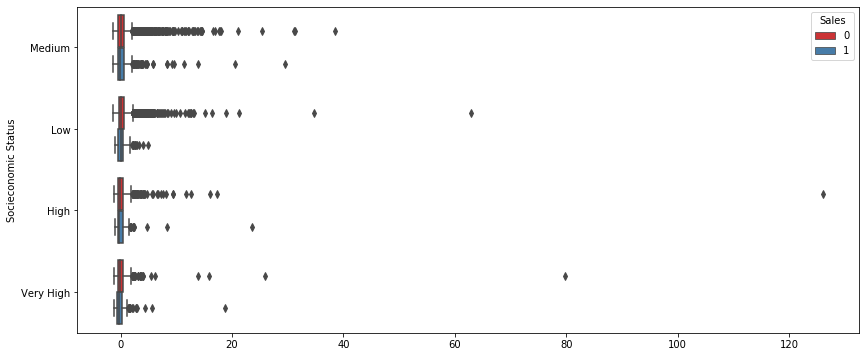

In [196]:
# Grouped boxplot
from sklearn.preprocessing import robust_scale
# Use robust_scale
xZ = robust_scale(dataset[0]['House Insurance'])

plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x=xZ, y="Socieconomic Status", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Pension Plan`

cont. variables indicates estimated amount of money the client would have in a pension plan.

In [197]:
print("The 22th variable to examine will be {0}".format(columns1[23]))

The 22th variable to examine will be Pension Plan


In [198]:
# Description
data_0[23:24]

,Variable Name,Meaning
23,Pension Plan,Estimated amount of money the client would hav...


In [199]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Pension Plan"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Pension Plan,,,
1661.7232800000002,1,0,1
2167.60008,0,1,1
2438.7088799999997,0,1,1
2511.39048,1,0,1
2543.38968,1,0,1
...,...,...,...
820750.01608,1,0,1
1322680.51608,1,0,1
1666940.39848,1,0,1


In [200]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Pension Plan", "Sales"]].groupby(['Pension Plan'], as_index=False).mean()

,Pension Plan,Sales
0,1.661723e+03,0.0
1,2.167600e+03,1.0
2,2.438709e+03,1.0
3,2.511390e+03,0.0
4,2.543390e+03,0.0
...,...,...
14136,7.413990e+05,0.0
14137,8.207500e+05,0.0
14138,1.322681e+06,0.0
14139,1.666940e+06,0.0


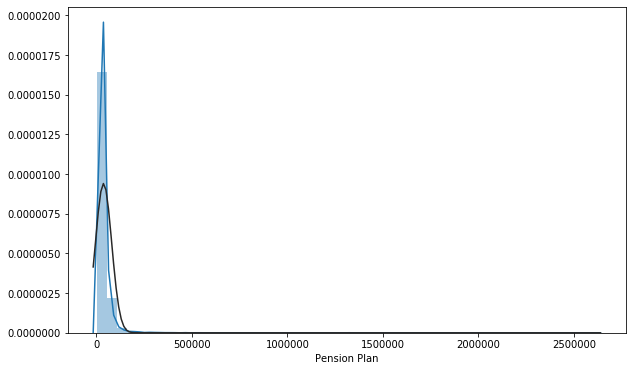

In [201]:
# Plot the distribution without null values
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['Pension Plan'].dropna(), 
             fit=norm)

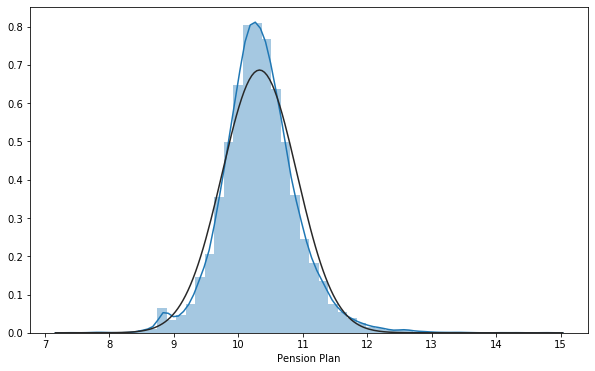

In [202]:
# Plot the distribution without null values by log1p
plt.figure(figsize= [10.0, 6.0])
sns.distplot(np.log1p(dataset[0]['Pension Plan']).dropna(), 
             fit=norm)

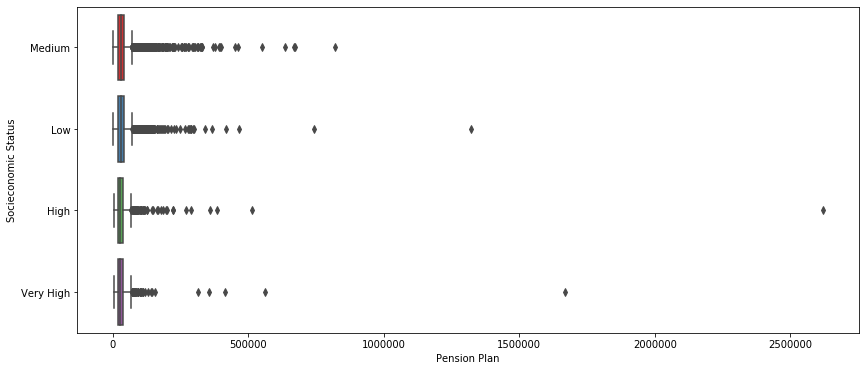

In [203]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Pension Plan", y="Socieconomic Status", data=dataset[0], palette="Set1")
plt.show()

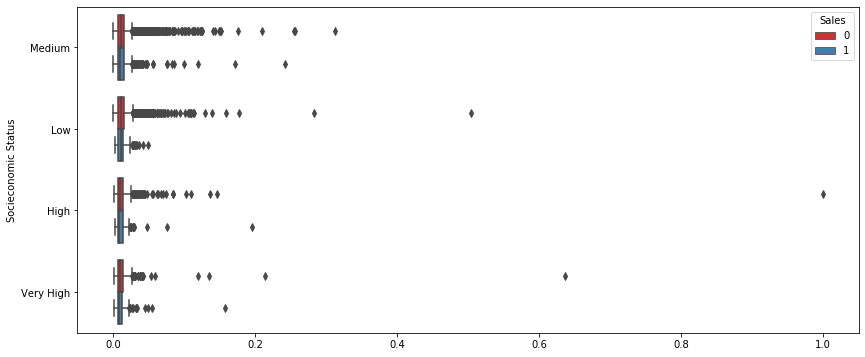

In [204]:
# Grouped boxplot

# Use MinMax Scale
xZ = minmax_scale(dataset[0]['Pension Plan'])

plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x=xZ, y="Socieconomic Status", hue="Sales", data=dataset[0], palette="Set1")
plt.show()

In [205]:
columns1

Index(['Obs', 'Sales', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
       'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Premium Offered',
       'Phone Call Day', 'CodeCategory', 'Birthdate', 'Product Type',
       'Number of Semesters Paid', 'Socieconomic Status', 'Province',
       'Right Address', 'Living Area (m^2)', 'House Price', 'Income',
       'yearBuilt', 'House Insurance', 'Pension Plan',
       'Estimated number of cars', 'Probability of Second Residence', 'Credit',
       'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices', 'Type of House'],
      dtype='object')

* * *

#### `Estimated number of cars`

categorical var. indicates a estimation of the number of cars owned by the client.

In [206]:
print("The 23th variable to examine will be {0}".format(columns1[24]))

The 23th variable to examine will be Estimated number of cars


In [207]:
# Description
data_0[24:25]

,Variable Name,Meaning
24,Estimated number of cars,Estimation of the number of cars owned by the ...


In [208]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Estimated number of cars"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Estimated number of cars,,,
None,7927,837,8764
One,3891,330,4221
Three,114,11,125
two,1628,122,1750
All,13560,1300,14860


In [209]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Estimated number of cars", "Sales"]].groupby(['Estimated number of cars'], as_index=False).mean()

,Estimated number of cars,Sales
0,None,0.095504
1,One,0.078181
2,Three,0.088000
3,two,0.069714


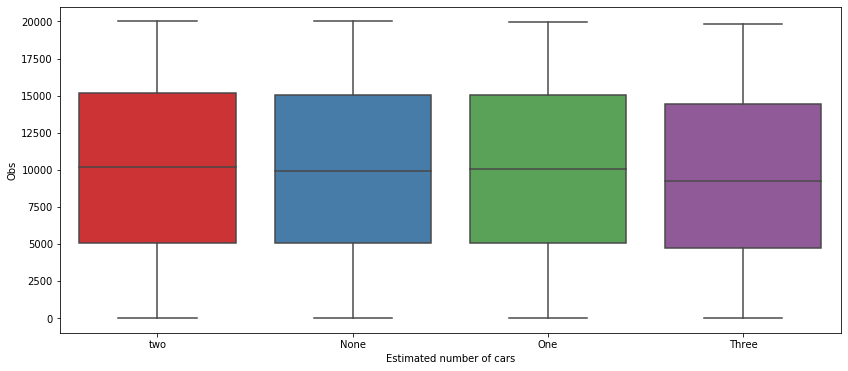

In [210]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Estimated number of cars", y="Obs", 
            data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Probability of Second Residence`

categorical variables indicates the probability of second residence.

In [211]:
print("The 24th variable to examine will be {0}".format(columns1[25]))

The 24th variable to examine will be Probability of Second Residence


In [212]:
# Description
data_0[25:26]

,Variable Name,Meaning
25,Probability of Second Residence,Probability of having a second residence


In [213]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Probability of Second Residence"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Probability of Second Residence,,,
High,122,11,133
Low,13180,1270,14450
Medium,258,19,277
All,13560,1300,14860


In [214]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Probability of Second Residence", "Sales"]].groupby(['Probability of Second Residence'], as_index=False).mean()

,Probability of Second Residence,Sales
0,High,0.082707
1,Low,0.087889
2,Medium,0.068592


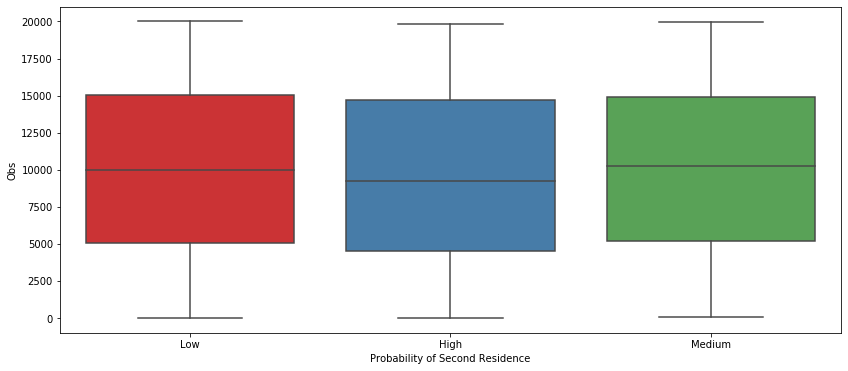

In [215]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Probability of Second Residence", y="Obs", 
            data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Credit`

cont. variables indicates the estimation of the amount of credit that could be offered to the client.

In [216]:
print("The 25th variable to examine will be {0}".format(columns1[26]))

The 25th variable to examine will be Credit


In [217]:
# Description
data_0[26:27]

,Variable Name,Meaning
26,Credit,Estimation of the amount of credit that could ...


In [218]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Credit"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Credit,,,
617.3886600000001,1,0,1
849.5634600000001,0,1,1
973.9902599999998,0,1,1
1007.3478600000001,1,0,1
1022.0340600000002,1,0,1
...,...,...,...
376542.23945999995,1,0,1
606905.86446,1,0,1
764905.7358599999,1,0,1


In [219]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Credit", "Sales"]].groupby(['Credit'], as_index=False).mean()

,Credit,Sales
0,6.173887e+02,0.0
1,8.495635e+02,1.0
2,9.739903e+02,1.0
3,1.007348e+03,0.0
4,1.022034e+03,0.0
...,...,...
14136,3.401237e+05,0.0
14137,3.765422e+05,0.0
14138,6.069059e+05,0.0
14139,7.649057e+05,0.0


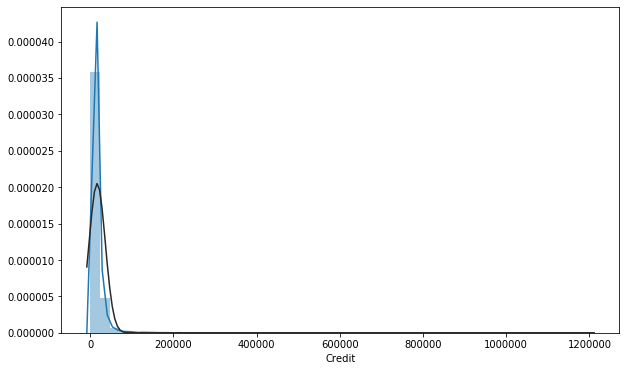

In [220]:
# Plot the distribution without null values
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['Credit'].dropna(), 
             fit=norm)

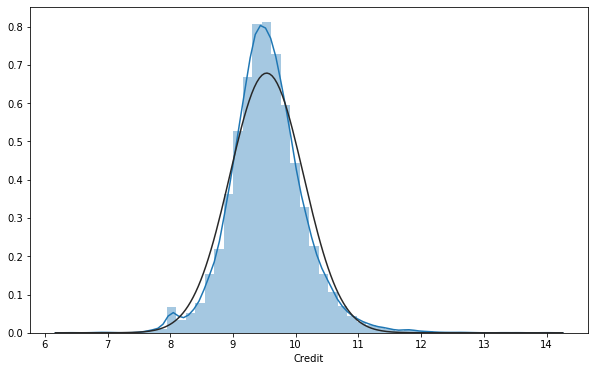

In [221]:
# Plot the distribution without null values by log1p
plt.figure(figsize= [10.0, 6.0])
sns.distplot(np.log1p(dataset[0]['Credit']).dropna(), 
             fit=norm)

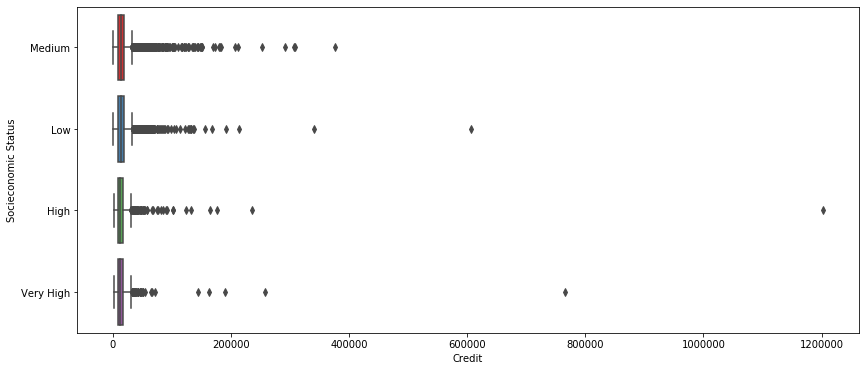

In [222]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Credit", y="Socieconomic Status", 
            data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Savings`

cont. variables indicates estimation of the amount of money saved by the client.

In [223]:
print("The 26th variable to examine will be {0}".format(columns1[27]))

The 26th variable to examine will be Savings


In [224]:
# Description
data_0[27:28]

,Variable Name,Meaning
27,Savings,Estimation of the amount of money saved by the...


In [225]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Savings"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Savings,,,
0.0,6964,717,7681
6719.922000000001,1,0,1
6726.078,1,0,1
6740.820000000001,1,0,1
6769.223999999999,0,1,1
...,...,...,...
1653930.387,1,0,1
1678577.418,1,0,1
2665282.941,1,0,1


In [226]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Savings", "Sales"]].groupby(['Savings'], as_index=False).mean()

,Savings,Sales
0,0.000,0.093347
1,6719.922,0.000000
2,6726.078,0.000000
3,6740.820,0.000000
4,6769.224,1.000000
...,...,...
6945,1494043.947,0.000000
6946,1653930.387,0.000000
6947,1678577.418,0.000000
6948,2665282.941,0.000000


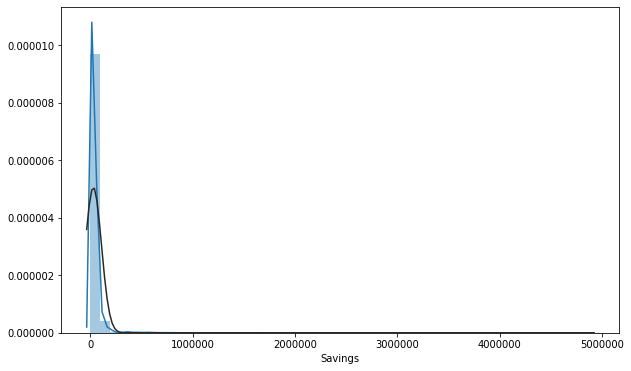

In [227]:
# Plot the distribution without null values
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset[0]['Savings'].dropna(), 
             fit=norm)

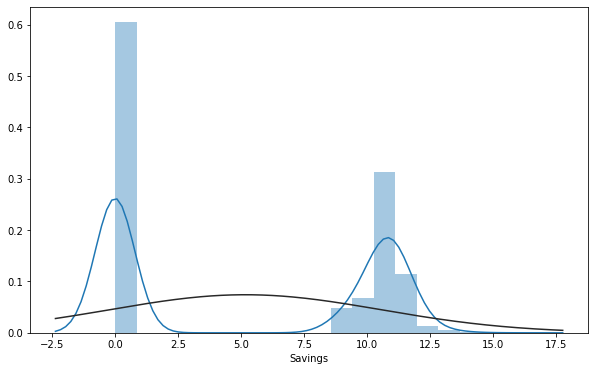

In [228]:
# Plot the distribution without null values by log1p
plt.figure(figsize= [10.0, 6.0])
sns.distplot(np.log1p(dataset[0]['Savings']).dropna(), 
             fit=norm)

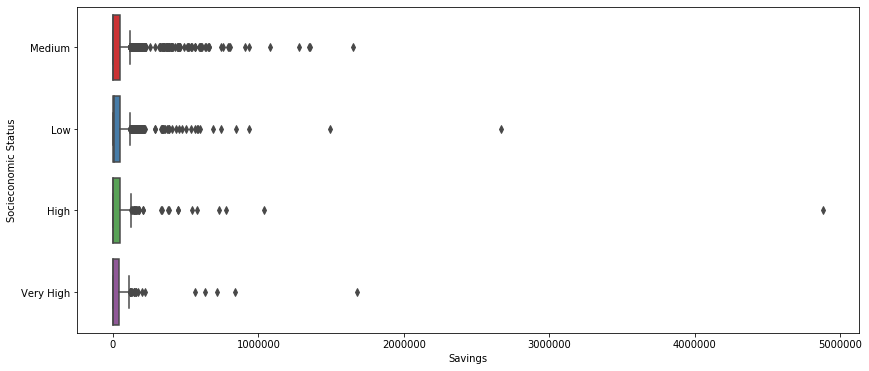

In [229]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Savings", y="Socieconomic Status", 
            data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Number of Mobile Phones`

discr. variable indicates number of mobile phones.

In [230]:
print("The 27th variable to examine will be {0}".format(columns1[28]))

The 27th variable to examine will be Number of Mobile Phones


In [231]:
# Description
data_0[28:29]

,Variable Name,Meaning
28,Number of Mobile Phones,Number of mobile phones


In [232]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Number of Mobile Phones"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Number of Mobile Phones,,,
0.0,1655,142,1797
1.0,1619,141,1760
2.0,1639,164,1803
3.0,1677,127,1804
All,6590,574,7164


In [233]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Number of Mobile Phones", "Sales"]].groupby(['Number of Mobile Phones'], as_index=False).mean()

,Number of Mobile Phones,Sales
0,0.0,0.079021
1,1.0,0.080114
2,2.0,0.090960
3,3.0,0.070399


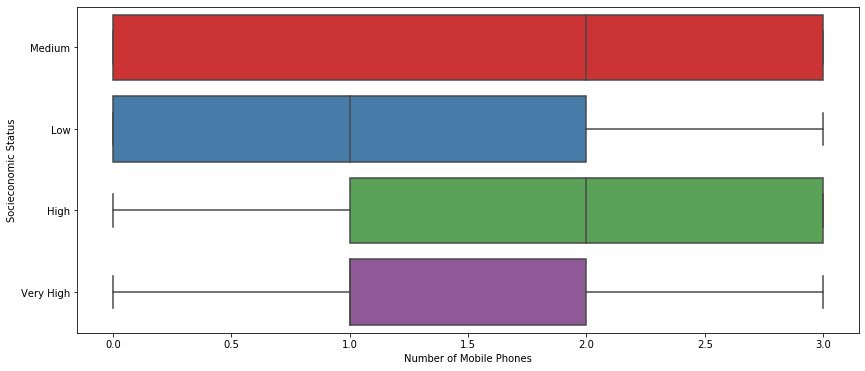

In [234]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Number of Mobile Phones", y="Socieconomic Status", 
            data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Number of Fixed Lines`

discr. variable indicates number of fixed lines.

In [235]:
print("The 28th variable to examine will be {0}".format(columns1[29]))

The 28th variable to examine will be Number of Fixed Lines


In [236]:
# Description
data_0[29:30]

,Variable Name,Meaning
29,Number of Fixed Lines,Number of Land Lines


In [237]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Number of Fixed Lines"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Number of Fixed Lines,,,
0.0,2190,184,2374
1.0,2179,198,2377
2.0,2221,192,2413
All,6590,574,7164


In [238]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Number of Fixed Lines", "Sales"]].groupby(['Number of Fixed Lines'], as_index=False).mean()

,Number of Fixed Lines,Sales
0,0.0,0.077506
1,1.0,0.083298
2,2.0,0.079569


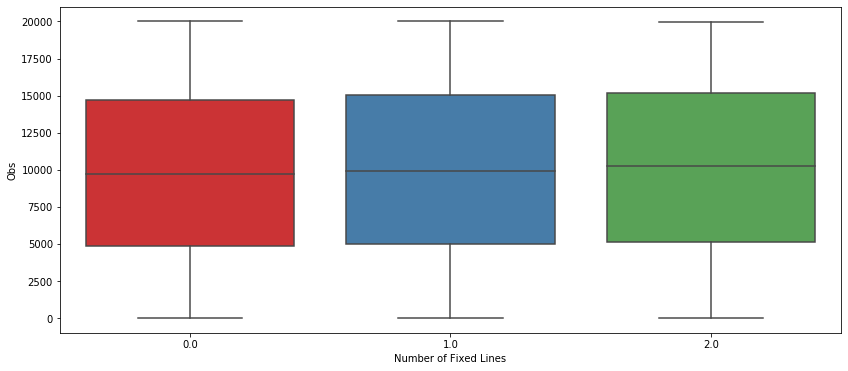

In [239]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Number of Fixed Lines", y="Obs", 
            data=dataset[0], palette="Set1")
plt.show()

* * *

#### `ADSL`

boolean variable indicates whether the client has ADSL or not.

In [240]:
print("The 29th variable to examine will be {0}".format(columns1[30]))

The 29th variable to examine will be ADSL


In [241]:
# Description
data_0[30:31]

,Variable Name,Meaning
30,ADSL,It indicates whether the client has ADSL:1 (ye...


In [242]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["ADSL"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
ADSL,,,
0.0,3285,281,3566
1.0,3305,293,3598
All,6590,574,7164


In [243]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["ADSL", "Sales"]].groupby(['ADSL'], as_index=False).mean()

,ADSL,Sales
0,0.0,0.078800
1,1.0,0.081434


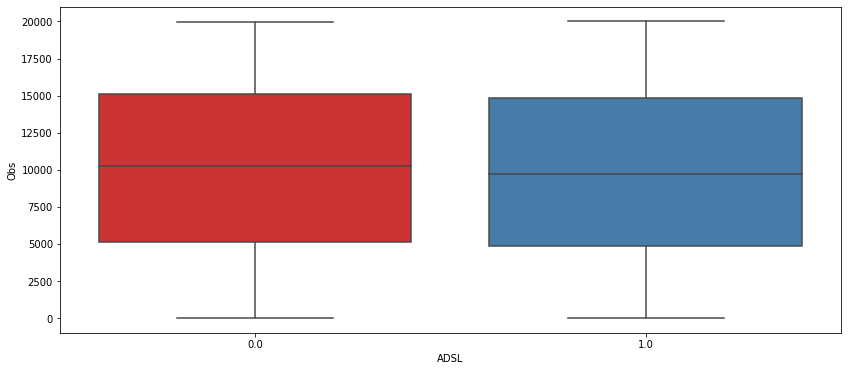

In [244]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="ADSL", y="Obs", 
            data=dataset[0], palette="Set1")
plt.show()

* * *

#### `3G Devices`

boolean variables indicates whether the clients has 3G devices or not.

In [245]:
print("The 30th variable to examine will be {0}".format(columns1[31]))

The 30th variable to examine will be 3G Devices


In [246]:
# Description
data_0[31:32]

,Variable Name,Meaning
31,3G Devices,It indicates whether the client has 3G Devices...


In [247]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["3G Devices"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
3G Devices,,,
0.0,3274,281,3555
1.0,3316,293,3609
All,6590,574,7164


In [248]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["3G Devices", "Sales"]].groupby(['3G Devices'], as_index=False).mean()

,3G Devices,Sales
0,0.0,0.079044
1,1.0,0.081186


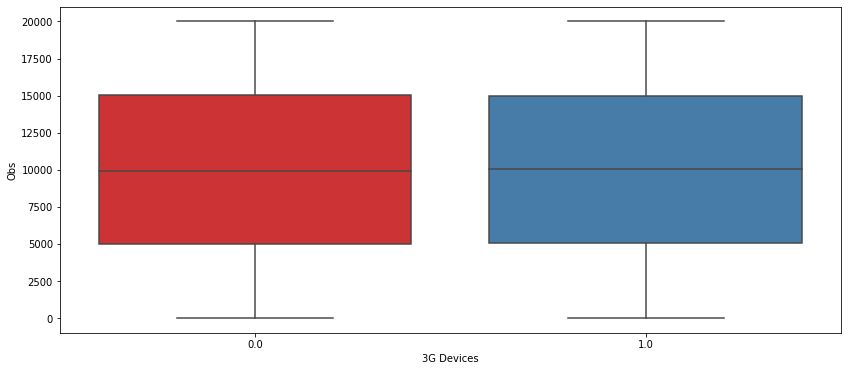

In [249]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="3G Devices", y="Obs", 
            data=dataset[0], palette="Set1")
plt.show()

* * *

#### `Type of House`

categ. variables indicates type of the house owned the client.

In [250]:
print("The 31th variable to examine will be {0}".format(columns1[32]))

The 31th variable to examine will be Type of House


In [251]:
# Description
data_0[32:33]

,Variable Name,Meaning
32,Type of House,Type of house: Urban or Rural


In [252]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Type of House"],
                        columns=dataset[0]["Sales"], margins=True)

Sales,0,1,All
Type of House,,,
Rustic,2751,257,3008
Urban,10794,1043,11837
All,13545,1300,14845


In [253]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Type of House", "Sales"]].groupby(['Type of House'], as_index=False).mean()

,Type of House,Sales
0,Rustic,0.085439
1,Urban,0.088114


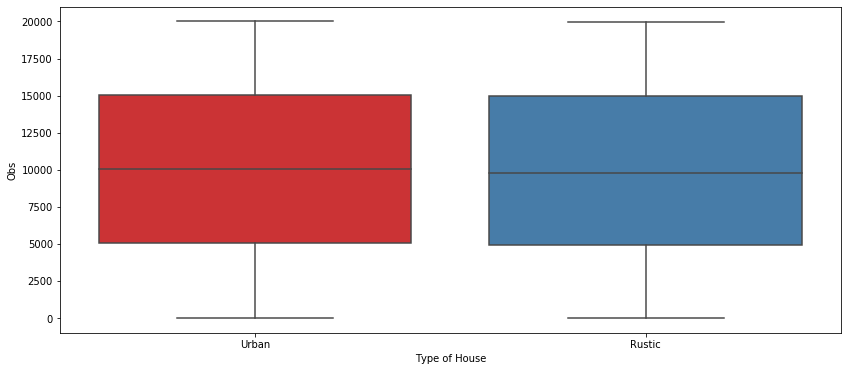

In [254]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Type of House", y="Obs", 
            data=dataset[0], palette="Set1")
plt.show()

In [255]:
# Save results and export for the second part

dataset[0].to_csv('df_eda_1.csv', index=False)
dataset[1].to_csv('df_eda_2.csv', index=False)

# First conclusion

After checked with the first part of **EDA - Exploratory Data Analysis**, we have first most important insights to show:

- The dataset where clients has been contacted and offer him premium products has `20k` values, and there are some null values, will be checked later.
- In this first instance we be able to prepare and manipulate dataset for to make a good model, maybe they are few data to receive a good `accuracy score` 
- There are `1715` customers are contracted `premium prod`, 18,285 don't. That is a 8,75%.
- Customer come from `Spain`, and only two provinces `Barcelona` and `Madrid` have more than 19% and 15% respectively of customers, 15 provinces less of 1%.
- `Medium` Socioeconomic Status is 54% of total customer, but only 10% of them bought the product. 
- 24% of customer that bought the product has `Very High` Socioeconomic status, and `Low` are 4%.
- `A` product has been bought 5.7%, `B` 2.8%, for instance 91% don't.

## Next steps

We decide to check missing values and divide the problem in two parts:
1. Impute Missing Values (categorical and numerical)
2. To do anything and remove part of them

The idea is to fit `three models` with and without missing values, like as a sample.
Very important and create three models and combination of two above (6 in total).
- Predict Sales
- Predict Premium product
- Predict which Premium product could we assign per each client.

* * *
### Estimated time to achieve 1_EDA

The First part has been achieved in `~6 hours`. We made investigation and analysis tasks.

To be continued with the 2nd part,  `2a - Wrangling and Cleansing Data`...